In [54]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm
from eistrick import eis_slit_width_offset

In [2]:
eis_data_set = scipy.io.readsav("../../save/new_lvl1_offset_limb_1116_northpole_tilt_cor_l1_20071116_07262.sav",verbose=False)
eis_wvl =  eis_data_set["wvl"]
eis_img = eis_data_set["new_data_offset"]
eis_err = eis_data_set["new_err_offset"]
eis_img_aver = np.average(eis_img,axis=0)
eis_err_aver = np.sqrt(np.sum(np.square(eis_err),axis=0))/7
eis_range = (372,402)

In [3]:
eis_img.shape

(7, 534, 4096)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


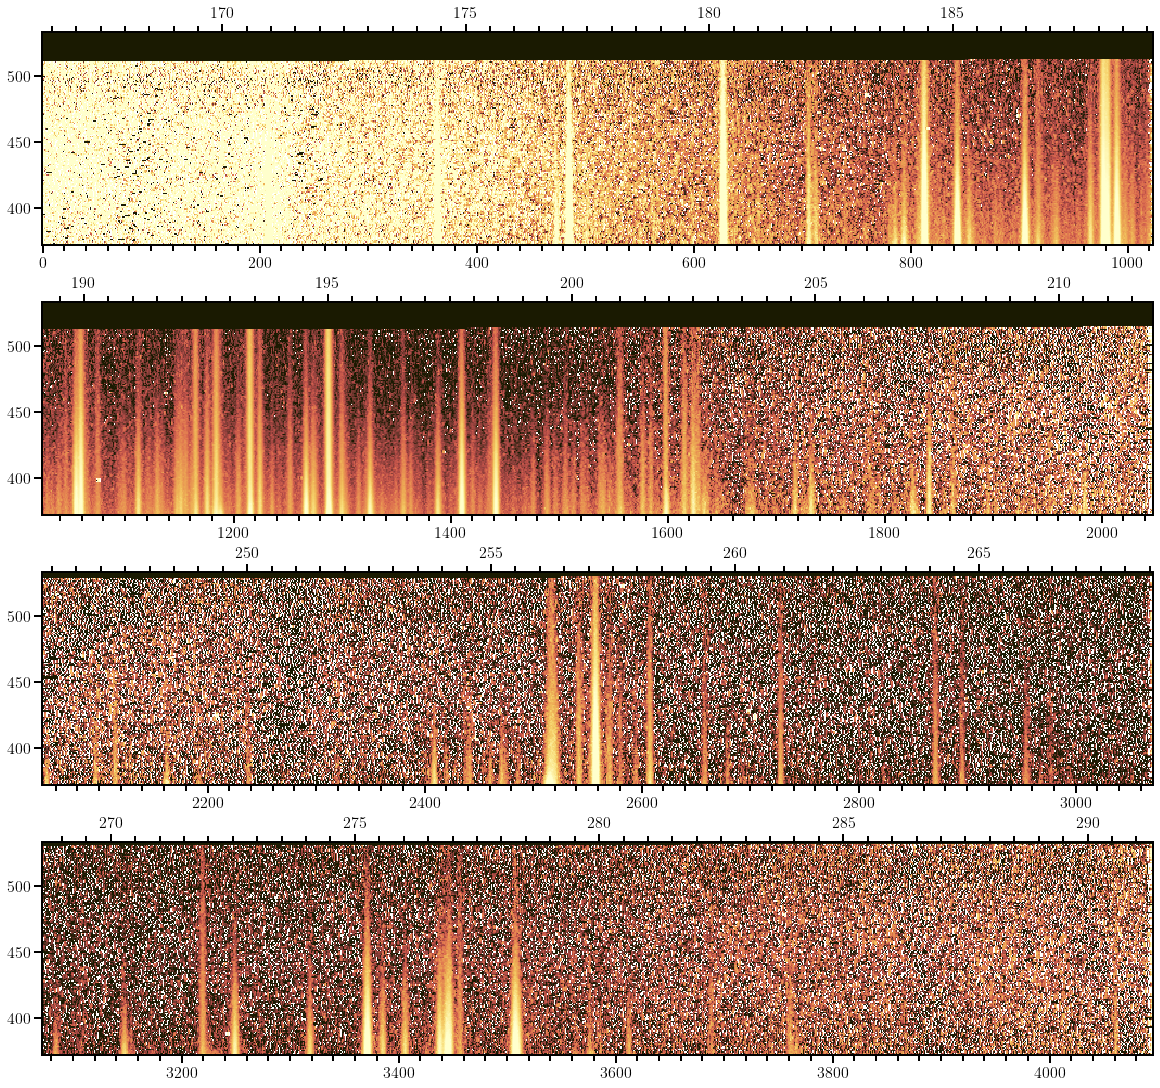

In [4]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

for ii in range(4):
    axes[ii].pcolormesh(np.arange(ii*1024,(ii+1)*1024),np.arange(372,534),
                    np.nan_to_num(np.log10(eis_img_aver[372:,ii*1024:(ii+1)*1024]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=0,vmax=2.5)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(eis_wvl[ii*1024],eis_wvl[(ii+1)*1024-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)

plt.savefig("../../figs/eis_window.png",dpi=300,format="png")


FWHM after removing instrumental broadening:  [0.04629548]


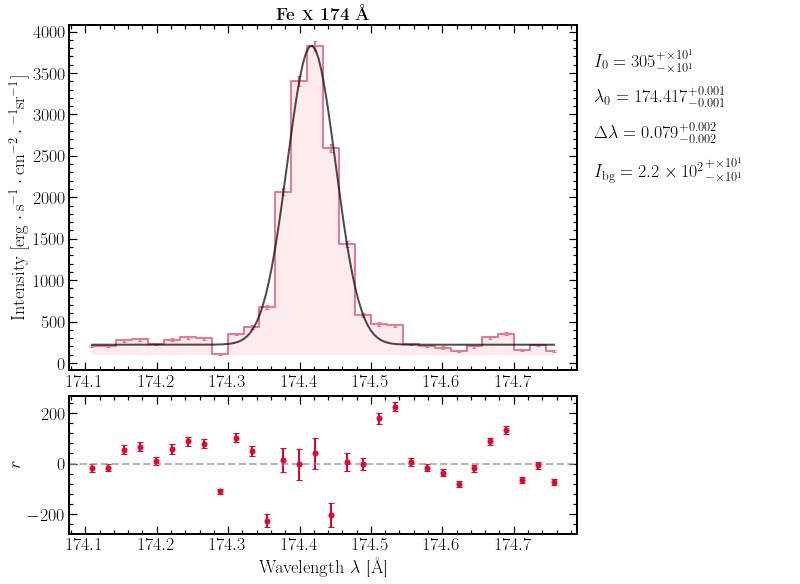

In [5]:
FeX_174_slice = (350,380)
wvl_FeX_174 = eis_wvl[FeX_174_slice[0]:FeX_174_slice[1]]
int_FeX_174 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_174_slice[0]:FeX_174_slice[1]],axis=0)

err_FeX_174 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_174_slice[0]:FeX_174_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_174_fit_model = SpectrumFitSingle(data=int_FeX_174,wvl=wvl_FeX_174,err=err_FeX_174,
                                      same_width=True,line_number=1,line_wvl_init=[174.4],
                                      int_max_init=[3500],fwhm_init=[0.2])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeX_174_fit_model.run_HahnMC(n_chain=10000)
FeX_174_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_174_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeX_174_fit_model.line_wvl_fit,eis_wvl[0])**2))

In [6]:
eis_slit_width_offset(387,2,FeX_174_fit_model.line_wvl_fit,eis_wvl[0])

array([0.06458448])

FWHM after removing instrumental broadening:  [0.0068874  0.04850742]


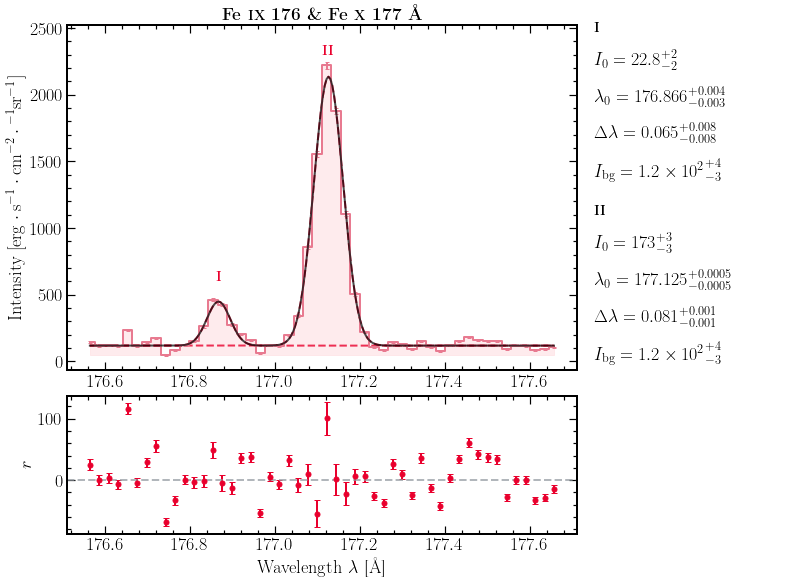

In [7]:
FeIX_176_FeX_177_slice = (460,510)
wvl_FeIX_176_FeX_177 = eis_wvl[FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]
int_FeIX_176_FeX_177 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]],axis=0)

err_FeIX_176_FeX_177 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_176_FeX_177_fit_model = SpectrumFitSingle(data=int_FeIX_176_FeX_177,wvl=wvl_FeIX_176_FeX_177,err=err_FeIX_176_FeX_177,
                                      same_width=False,line_number=2,line_wvl_init=[176.9,177.12],
                                      int_max_init=[400,2000],fwhm_init=[0.1,0.1])
# FeIX_176_FeX_177_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_176_FeX_177_fit_model.run_HahnMC(n_chain=10000)
FeIX_176_FeX_177_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_176_FeX_177_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeIX_176_FeX_177_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05503764]


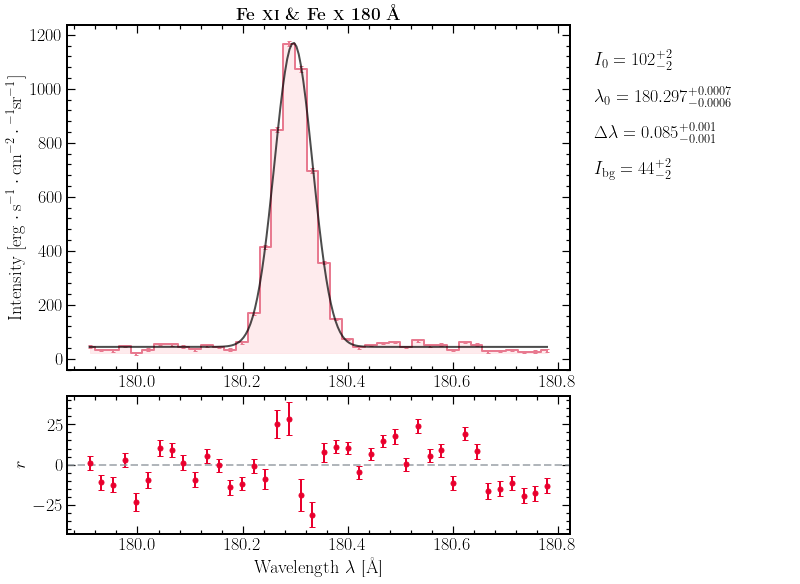

In [8]:
FeXI_FeX_180_slice = (610,650)
wvl_FeXI_FeX_180 = eis_wvl[FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]
int_FeXI_FeX_180 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]],axis=0)

err_FeXI_FeX_180 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeX_180_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_180,wvl=wvl_FeXI_FeX_180,err=err_FeXI_FeX_180,
                                      same_width=False,line_number=1,line_wvl_init=[180.4],
                                      int_max_init=[1100],fwhm_init=[0.1])
# FeXI_FeX_180_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_180_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_180_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 180 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_180_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXI_FeX_180_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04640329 0.05805553]


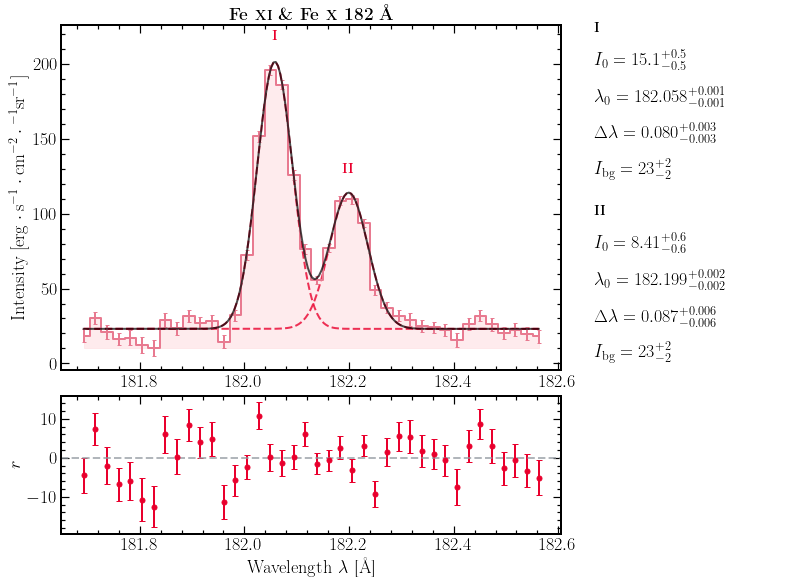

In [9]:
FeXI_FeX_182_slice = (690,730)
wvl_FeXI_FeX_182 = eis_wvl[FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]
int_FeXI_FeX_182 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]],axis=0)

err_FeXI_FeX_182 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeX_182_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_182,wvl=wvl_FeXI_FeX_182,err=err_FeXI_FeX_182,
                                      same_width=False,line_number=2,line_wvl_init=[182.1,182.2],
                                      int_max_init=[200,100],fwhm_init=[0.1,0.1])
#FeXI_FeX_182_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_182_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_182_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 182 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_182_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXI_FeX_182_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06577484 0.04957117]


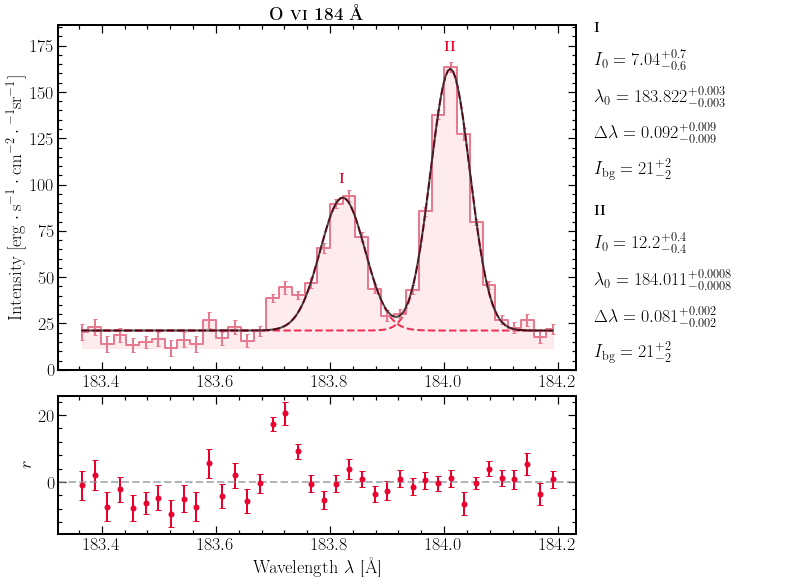

In [10]:
OVI_184_slice = (765,803)
wvl_OVI_184 = eis_wvl[OVI_184_slice[0]:OVI_184_slice[1]]
int_OVI_184 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    OVI_184_slice[0]:OVI_184_slice[1]],axis=0)

err_OVI_184 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        OVI_184_slice[0]:OVI_184_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

OVI_184_fit_model = SpectrumFitSingle(data=int_OVI_184,wvl=wvl_OVI_184,err=err_OVI_184,
                                      same_width=False,line_number=2,line_wvl_init=[183.83,184.0],
                                      int_max_init=[100,140],fwhm_init=[0.07,0.07])
# OVI_184_fit_model.plot(plot_fit=False,plot_params=False)
OVI_184_fit_model.run_HahnMC(n_chain=10000)
OVI_184_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 184 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(OVI_184_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,OVI_184_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03705858 0.04426435]


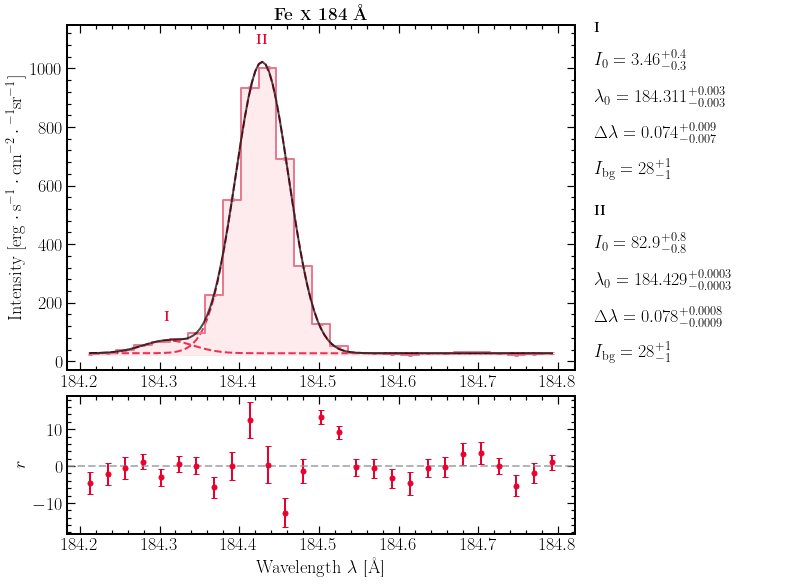

In [11]:
FeX_184_slice = (803,830)
wvl_FeX_184 = eis_wvl[FeX_184_slice[0]:FeX_184_slice[1]]
int_FeX_184 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_184_slice[0]:FeX_184_slice[1]],axis=0)

err_FeX_184 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_184_slice[0]:FeX_184_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_184_fit_model = SpectrumFitSingle(data=int_FeX_184,wvl=wvl_FeX_184,err=err_FeX_184,
                                      same_width=False,line_number=2,line_wvl_init=[184.3,184.45],
                                      int_max_init=[100,1000],fwhm_init=[0.07,0.07])
# FeX_184_fit_model.plot(plot_fit=False,plot_params=False)
FeX_184_fit_model.run_HahnMC(n_chain=10000)
FeX_184_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_184_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeX_184_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04095883]


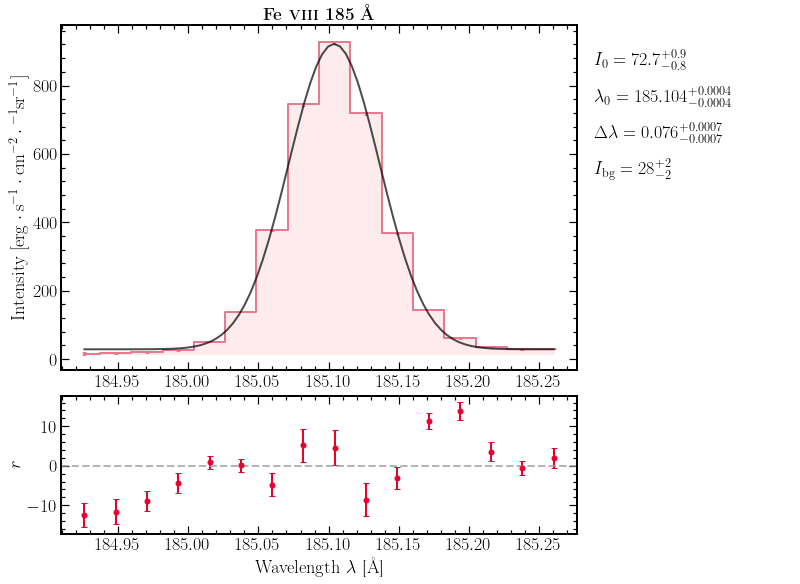

In [12]:
FeVIII_185_slice = (835,851)
wvl_FeVIII_185 = eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]]
int_FeVIII_185 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0)

err_FeVIII_185 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_185_slice[0]:FeVIII_185_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_185_fit_model = SpectrumFitSingle(data=int_FeVIII_185,wvl=wvl_FeVIII_185,err=err_FeVIII_185,
                                      same_width=False,line_number=1,line_wvl_init=[185.1],
                                      int_max_init=[800],fwhm_init=[0.07])
#FeVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_185_fit_model.run_HahnMC(n_chain=10000)
FeVIII_185_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeVIII_185_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07258726]


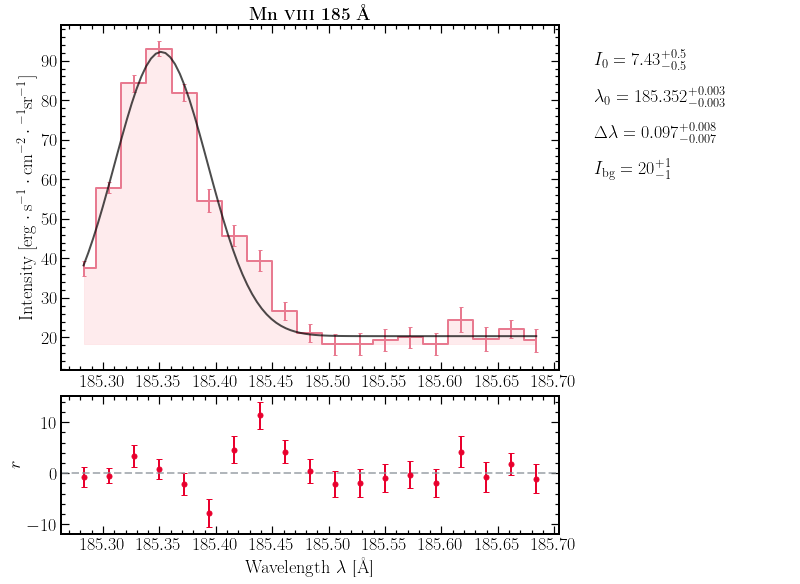

In [13]:
MnVIII_185_slice = (851,870)
wvl_MnVIII_185 = eis_wvl[MnVIII_185_slice[0]:MnVIII_185_slice[1]]
int_MnVIII_185 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnVIII_185_slice[0]:MnVIII_185_slice[1]],axis=0)

err_MnVIII_185 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnVIII_185_slice[0]:MnVIII_185_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnVIII_185_fit_model = SpectrumFitSingle(data=int_MnVIII_185,wvl=wvl_MnVIII_185,err=err_MnVIII_185,
                                      same_width=False,line_number=1,line_wvl_init=[185.3],
                                      int_max_init=[50],fwhm_init=[0.07])
#MnVIII_185_fit_model.plot(plot_fit=False,plot_params=False)
MnVIII_185_fit_model.run_HahnMC(n_chain=10000)
MnVIII_185_fit_model.plot(plot_title=r"\textbf{Mn \textsc{viii} 185 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnVIII_185_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,MnVIII_185_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04688153]


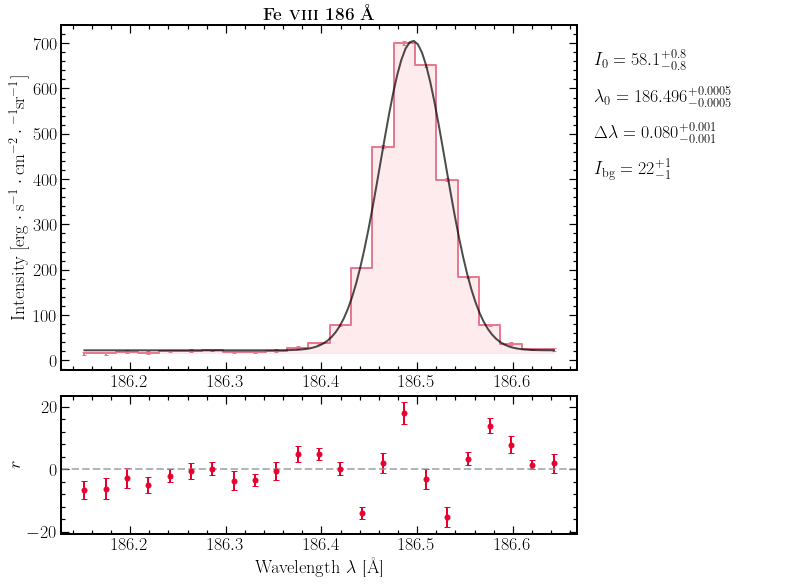

In [14]:
FeVIII_186_slice = (890,913)
wvl_FeVIII_186 = eis_wvl[FeVIII_186_slice[0]:FeVIII_186_slice[1]]
int_FeVIII_186 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_186_slice[0]:FeVIII_186_slice[1]],axis=0)

err_FeVIII_186 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_186_slice[0]:FeVIII_186_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_186_fit_model = SpectrumFitSingle(data=int_FeVIII_186,wvl=wvl_FeVIII_186,err=err_FeVIII_186,
                                      same_width=False,line_number=1,line_wvl_init=[186.5],
                                      int_max_init=[600],fwhm_init=[0.07])
# FeVIII_186_fit_model.plot(plot_fit=False,plot_params=False)
FeVIII_186_fit_model.run_HahnMC(n_chain=10000)
FeVIII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_186_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeVIII_186_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07819805 0.07309992]


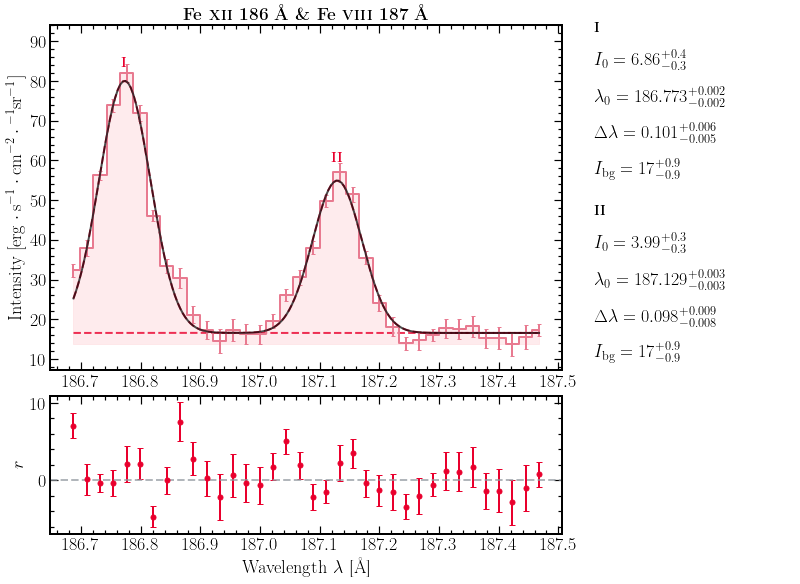

In [15]:
FeXII_186_slice = (914,950)
wvl_FeXII_186 = eis_wvl[FeXII_186_slice[0]:FeXII_186_slice[1]]
int_FeXII_186 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_186_slice[0]:FeXII_186_slice[1]],axis=0)

err_FeXII_186 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_186_slice[0]:FeXII_186_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_186_fit_model = SpectrumFitSingle(data=int_FeXII_186,wvl=wvl_FeXII_186,err=err_FeXII_186,
                                      same_width=False,line_number=2,line_wvl_init=[186.75,187.16],
                                      int_max_init=[80,60],fwhm_init=[0.07,0.07])
# FeXII_186_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_186_fit_model.run_HahnMC(n_chain=10000)
FeXII_186_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA} \& Fe \textsc{viii} 187 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_186_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXII_186_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04280204 0.04873513 0.04873521 0.05008735]


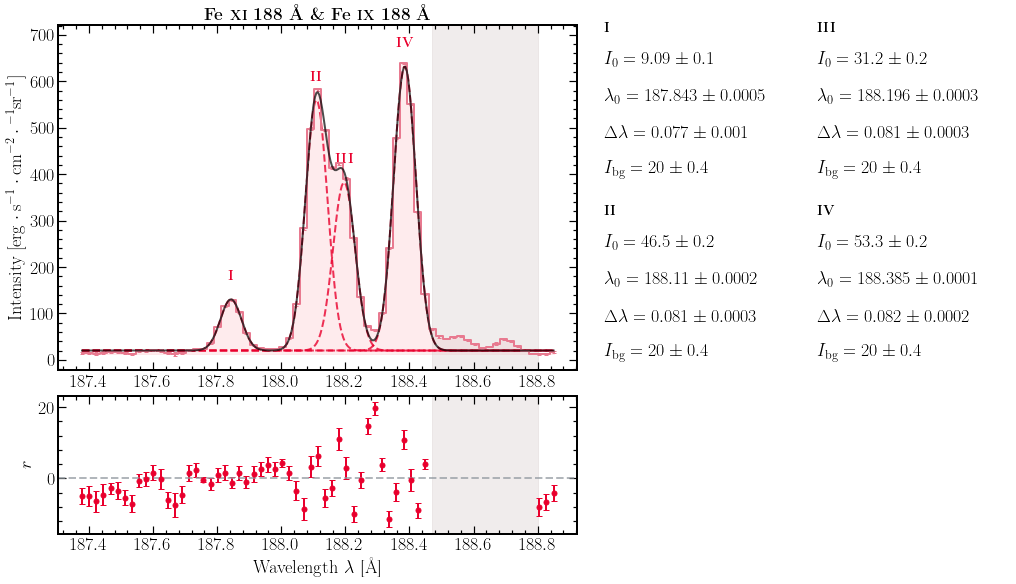

In [16]:
FeXI_188_slice = (945,1012)
wvl_FeXI_188 = eis_wvl[FeXI_188_slice[0]:FeXI_188_slice[1]]
int_FeXI_188 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_188_slice[0]:FeXI_188_slice[1]],axis=0)

err_FeXI_188 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_188_slice[0]:FeXI_188_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_188_fit_model = SpectrumFitSingle(data=int_FeXI_188,wvl=wvl_FeXI_188,err=err_FeXI_188,
                                      same_width=[False,True,True,False],line_number=4,
                                      line_wvl_init=[187.85,188.1,188.17,188.37],
                                      int_max_init=[100,600,400,600],
                                      fwhm_init=[0.07,0.07,0.07,0.07],mask=[[188.47,188.8]])
# FeXI_188_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_188_fit_model.run_lse()
FeXI_188_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA} \& Fe \textsc{ix} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXI_188_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04957159 0.04957173]


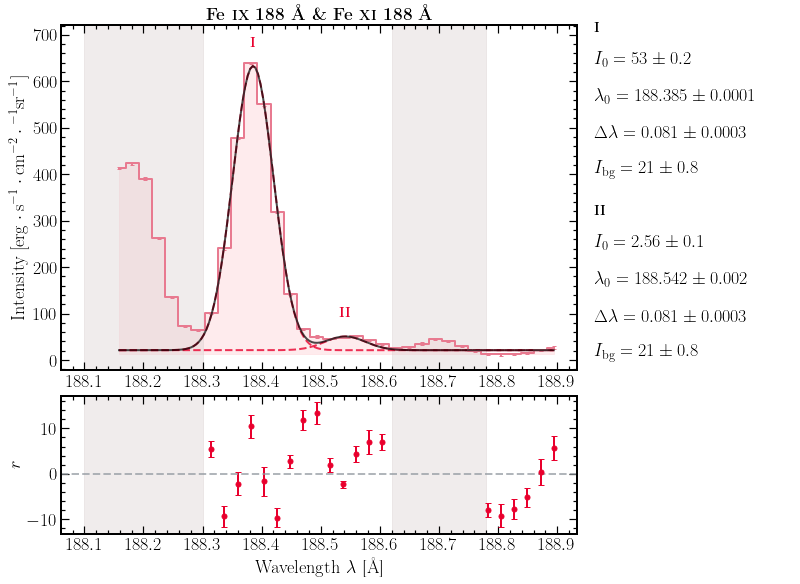

In [17]:
FeIX_188_slice = (980,1014)
wvl_FeIX_188 = eis_wvl[FeIX_188_slice[0]:FeIX_188_slice[1]]
int_FeIX_188 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_188_slice[0]:FeIX_188_slice[1]],axis=0)

err_FeIX_188 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_188_slice[0]:FeIX_188_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_188_fit_model = SpectrumFitSingle(data=int_FeIX_188,wvl=wvl_FeIX_188,err=err_FeIX_188,
                                      same_width=[True,True,False],line_number=2,
                                      line_wvl_init=[188.37,188.55],
                                      int_max_init=[600,50],
                                      fwhm_init=[0.08,0.08],mask=[[188.1,188.3],[188.62,188.78]])
# FeIX_188_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_188_fit_model.run_lse()
FeIX_188_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 188 \mbox{\AA} \& Fe \textsc{xi} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_188_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeIX_188_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07395011 0.07395024]


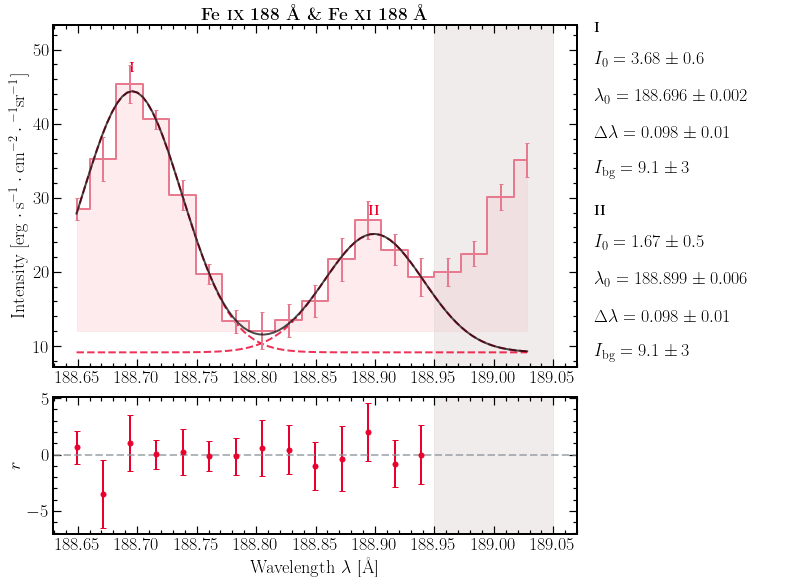

In [18]:
FeXI_188_189_slice = (1002,1020)
wvl_FeXI_188_189 = eis_wvl[FeXI_188_189_slice[0]:FeXI_188_189_slice[1]]
int_FeXI_188_189 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_188_189_slice[0]:FeXI_188_189_slice[1]],axis=0)

err_FeXI_188_189 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_188_189_slice[0]:FeXI_188_189_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_188_189_fit_model = SpectrumFitSingle(data=int_FeXI_188_189,wvl=wvl_FeXI_188_189,err=err_FeXI_188_189,
                                      same_width=True,line_number=2,
                                      line_wvl_init=[188.7,188.9],
                                      int_max_init=[40,25],
                                      fwhm_init=[0.08],mask=[[188.95,189.05]])
# FeXI_188_189_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_188_189_fit_model.run_lse()
FeXI_188_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 188 \mbox{\AA} \& Fe \textsc{xi} 188 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_188_189_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXI_188_189_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03292704 0.05623011]


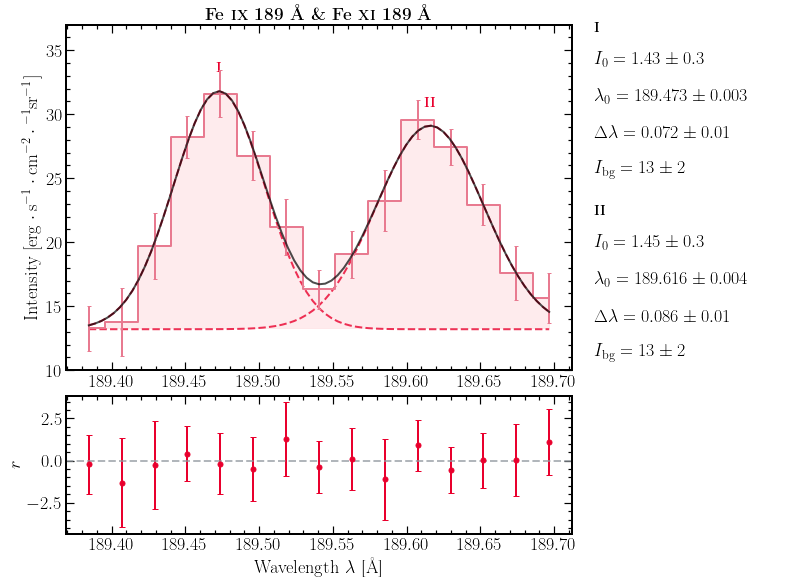

In [19]:
FeIX_FeXI_189_slice = (1035,1050)
wvl_FeIX_FeXI_189 = eis_wvl[FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]]
int_FeIX_FeXI_189 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]],axis=0)

err_FeIX_FeXI_189 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_FeXI_189_slice[0]:FeIX_FeXI_189_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_FeXI_189_fit_model = SpectrumFitSingle(data=int_FeIX_FeXI_189,wvl=wvl_FeIX_FeXI_189,err=err_FeIX_FeXI_189,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[189.47,189.62],
                                      int_max_init=[30,30],
                                      fwhm_init=[0.08,0.08])
# FeIX_FeXI_189_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_FeXI_189_fit_model.run_lse()
FeIX_FeXI_189_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 189 \mbox{\AA} \& Fe \textsc{xi} 189 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_FeXI_189_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeIX_FeXI_189_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03923955 0.04693667]


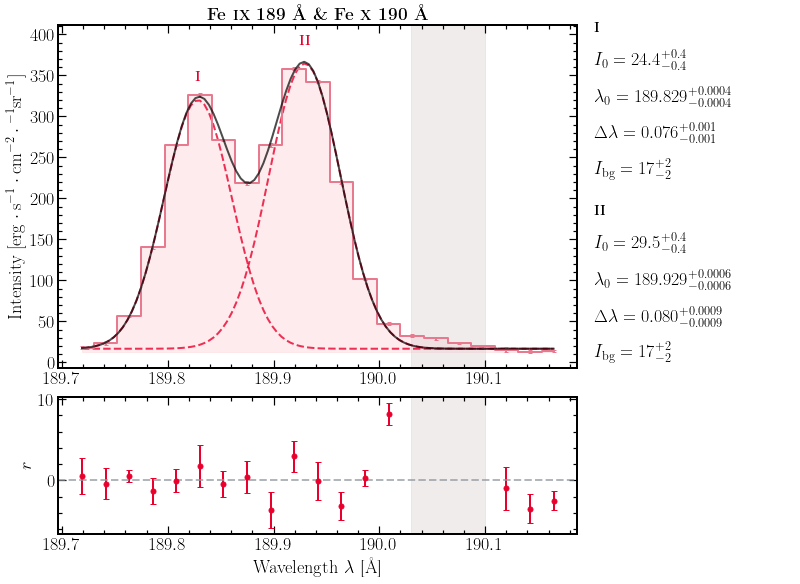

In [20]:
FeIX_189_FeX_190_slice = (1050,1071)
wvl_FeIX_189_FeX_190 = eis_wvl[FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]]
int_FeIX_189_FeX_190 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]],axis=0)

err_FeIX_189_FeX_190 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_189_FeX_190_slice[0]:FeIX_189_FeX_190_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_189_FeX_190_fit_model = SpectrumFitSingle(data=int_FeIX_189_FeX_190,wvl=wvl_FeIX_189_FeX_190,err=err_FeIX_189_FeX_190,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[189.83,189.92],
                                      int_max_init=[300,300],
                                      fwhm_init=[0.08,0.08],mask=[[190.03,190.1]])
# FeIX_189_FeX_190_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_189_FeX_190_fit_model.run_HahnMC(n_chain=10000)
FeIX_189_FeX_190_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 189 \mbox{\AA} \& Fe \textsc{x} 190 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_189_FeX_190_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeIX_189_FeX_190_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0604537]


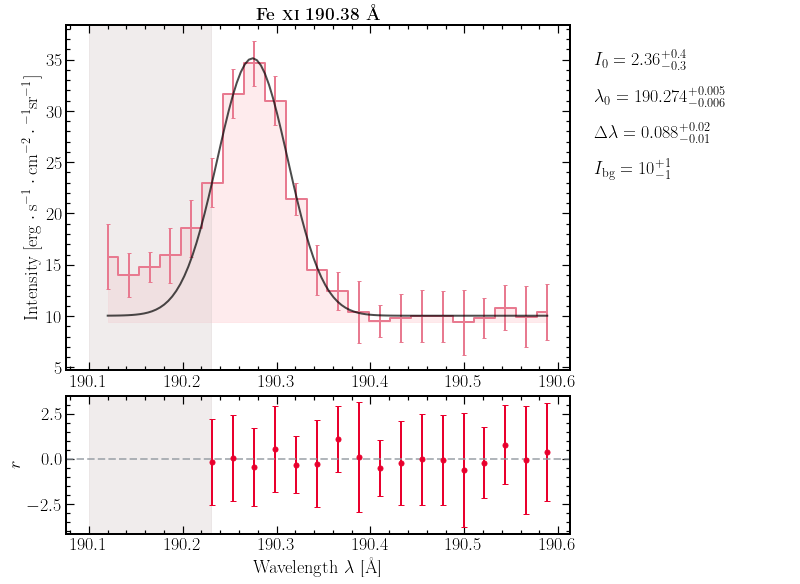

In [21]:
FeXI_190_slice = (1068,1090)
wvl_FeXI_190 = eis_wvl[FeXI_190_slice[0]:FeXI_190_slice[1]]
int_FeXI_190 = np.average(eis_img_aver[eis_range[0]:397,
                                    FeXI_190_slice[0]:FeXI_190_slice[1]],axis=0)

err_FeXI_190 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:397,
                        FeXI_190_slice[0]:FeXI_190_slice[1]]),axis=0))/(397-eis_range[0])

FeXI_190_fit_model = SpectrumFitSingle(data=int_FeXI_190,wvl=wvl_FeXI_190,err=err_FeXI_190,
                                      same_width=True,line_number=1,line_wvl_init=[190.27],
                                      int_max_init=[25],fwhm_init=[0.07],mask=[[190.1,190.23]])
# FeXI_190_fit_model.plot(plot_fit=False,plot_params=False,plot_title=r"\textbf{Fe \textsc{xi} 190.38 \mbox{\AA}}?")
FeXI_190_fit_model.run_HahnMC(n_chain=10000)
FeXI_190_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 190.38 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_190_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXI_190_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04281619]


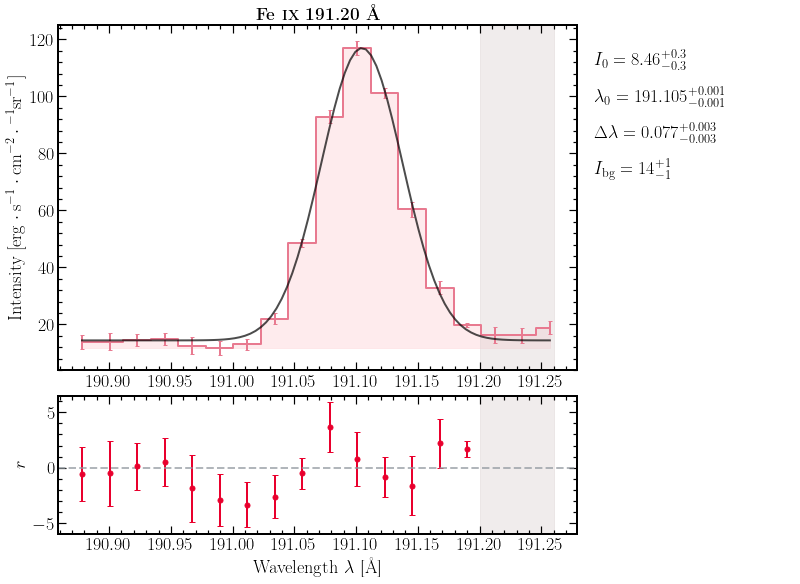

In [22]:
FeIX_191_slice = (1102,1120)
wvl_FeIX_191 = eis_wvl[FeIX_191_slice[0]:FeIX_191_slice[1]]
int_FeIX_191 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_191_slice[0]:FeIX_191_slice[1]],axis=0)

err_FeIX_191 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_191_slice[0]:FeIX_191_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_191_fit_model = SpectrumFitSingle(data=int_FeIX_191,wvl=wvl_FeIX_191,err=err_FeIX_191,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[191.1],
                                      int_max_init=[100],
                                      fwhm_init=[0.08],mask=[[191.2,191.26]])
# FeIX_191_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_191_fit_model.run_HahnMC(n_chain=10000)
# FeIX_191_fit_model.run_lse()
FeIX_191_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 191.20 \mbox{\AA}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_191_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeIX_191_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.06262746 0.06262759        nan]


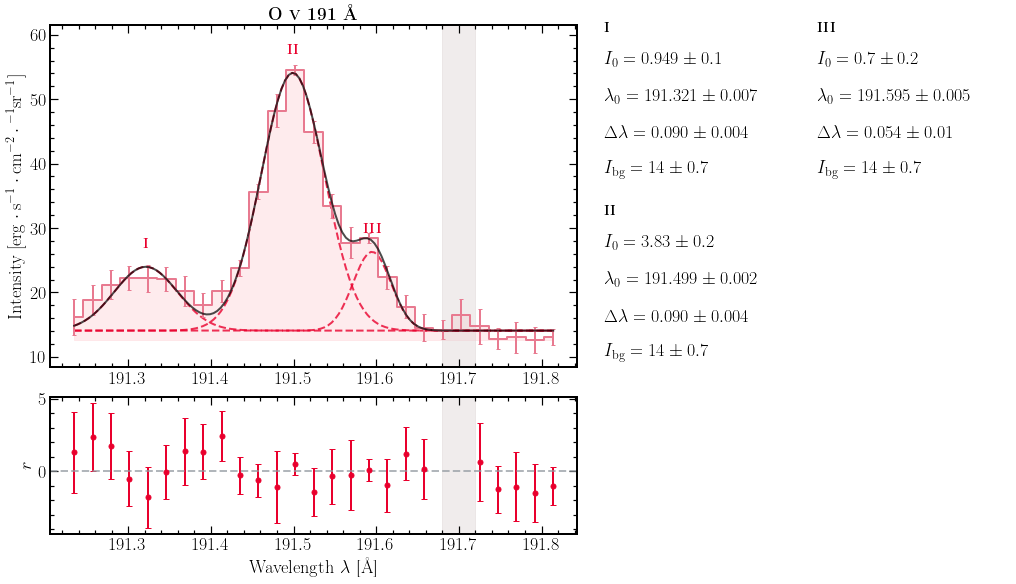

In [23]:
OV_191_slice = (1118,1145)
wvl_OV_191 = eis_wvl[OV_191_slice[0]:OV_191_slice[1]]
int_OV_191 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    OV_191_slice[0]:OV_191_slice[1]],axis=0)

err_OV_191 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        OV_191_slice[0]:OV_191_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

OV_191_fit_model = SpectrumFitSingle(data=int_OV_191,wvl=wvl_OV_191,err=err_OV_191,
                                      same_width=[True,True,False],line_number=3,
                                      line_wvl_init=[191.3,191.5,191.59],
                                      int_max_init=[10,40,20],
                                      fwhm_init=[0.08,0.08,0.08],mask=[[191.68,191.72]])
# OV_191_fit_model.plot(plot_fit=False,plot_params=False)
# OV_191_fit_model.run_HahnMC(n_chain=10000)
OV_191_fit_model.run_lse()
OV_191_fit_model.plot(plot_title=r"\textbf{O \textsc{v} 191 \mbox{\AA}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(OV_191_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,OV_191_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04144589 0.03707242 0.05517418 0.04470995 0.04944465]


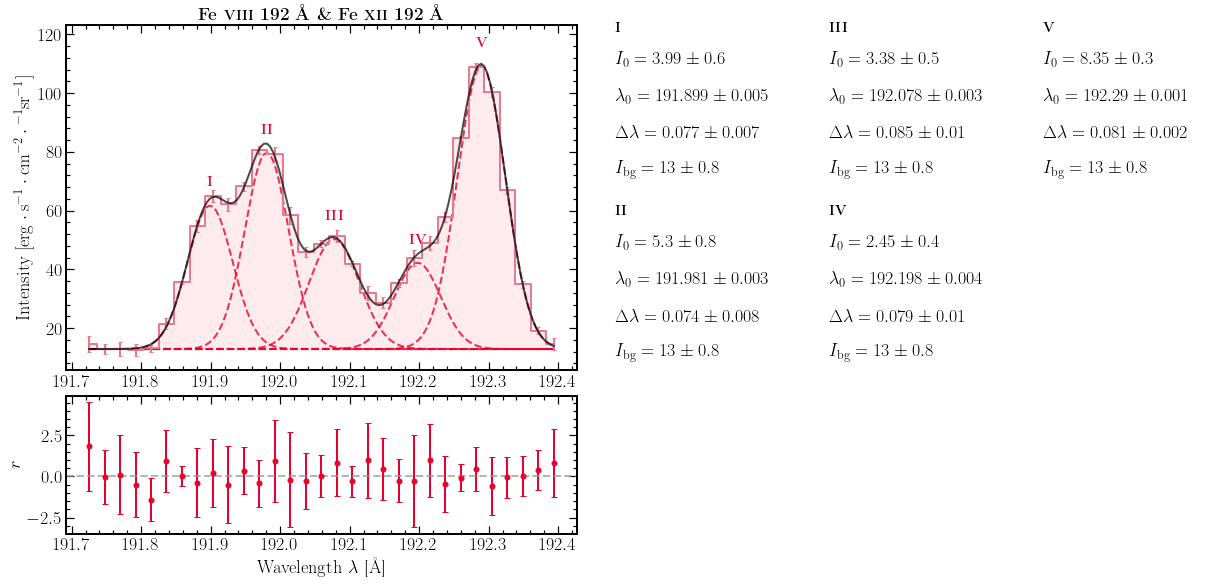

In [24]:
FeVIII_FeXI_192_slice = (1140,1171)
wvl_FeVIII_FeXI_192 = eis_wvl[FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]]
int_FeVIII_FeXI_192 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]],axis=0)

err_FeVIII_FeXI_192 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_FeXI_192_slice[0]:FeVIII_FeXI_192_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_FeXI_192_fit_model = SpectrumFitSingle(data=int_FeVIII_FeXI_192,wvl=wvl_FeVIII_FeXI_192,err=err_FeVIII_FeXI_192,
                                      same_width=False,line_number=5,
                                      line_wvl_init=[191.88,191.95,192.08,192.2,192.3],
                                      int_max_init=[50,60,30,30,100],
                                      fwhm_init=[0.08,0.08,0.08,0.08,0.08])
# FeVIII_FeXI_192_fit_model.plot(plot_fit=False,plot_params=False)
# # FeVIII_FeXI_192_fit_model.run_HahnMC(n_chain=10000)
FeVIII_FeXI_192_fit_model.run_lse()
FeVIII_FeXI_192_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 192 \mbox{\AA} \& Fe \textsc{xii} 192 \mbox{\AA}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_FeXI_192_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_FeXI_192_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0501147  0.06751899 0.02928462]


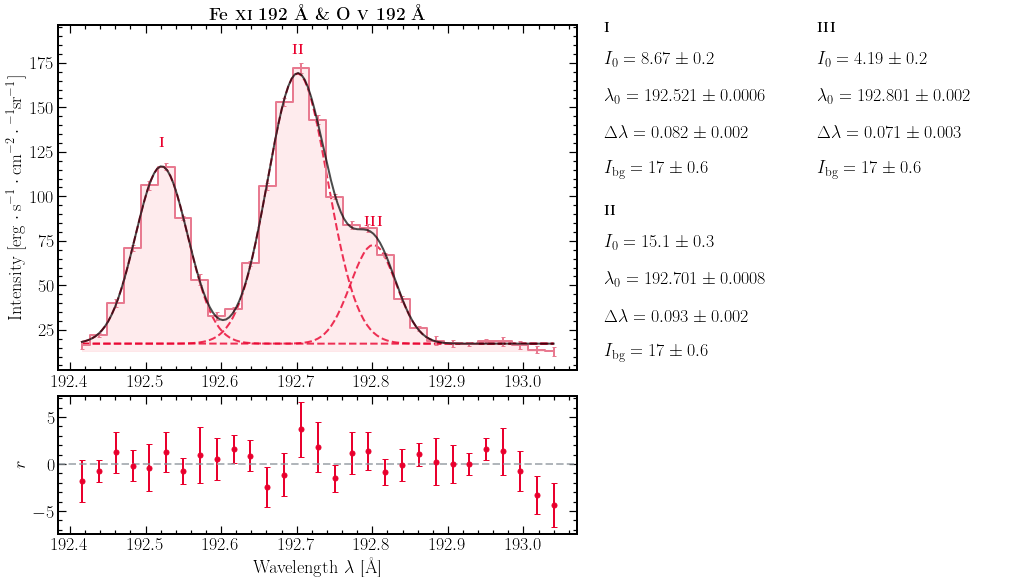

In [25]:
FeIX_OV_192_slice = (1171,1200)
wvl_FeIX_OV_192 = eis_wvl[FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]]
int_FeIX_OV_192 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]],axis=0)

err_FeIX_OV_192 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_OV_192_slice[0]:FeIX_OV_192_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_OV_192_fit_model = SpectrumFitSingle(data=int_FeIX_OV_192,wvl=wvl_FeIX_OV_192,err=err_FeIX_OV_192,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[192.51,192.7,192.8],
                                      int_max_init=[100,160,65],
                                      fwhm_init=[0.08,0.08,0.08])
# FeIX_OV_192_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_OV_192_fit_model.run_HahnMC(n_chain=10000)
FeIX_OV_192_fit_model.run_lse()
FeIX_OV_192_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 192 \mbox{\AA} \& O \textsc{v} 192 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_OV_192_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeIX_OV_192_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.02388149 0.04818438 0.04346169]


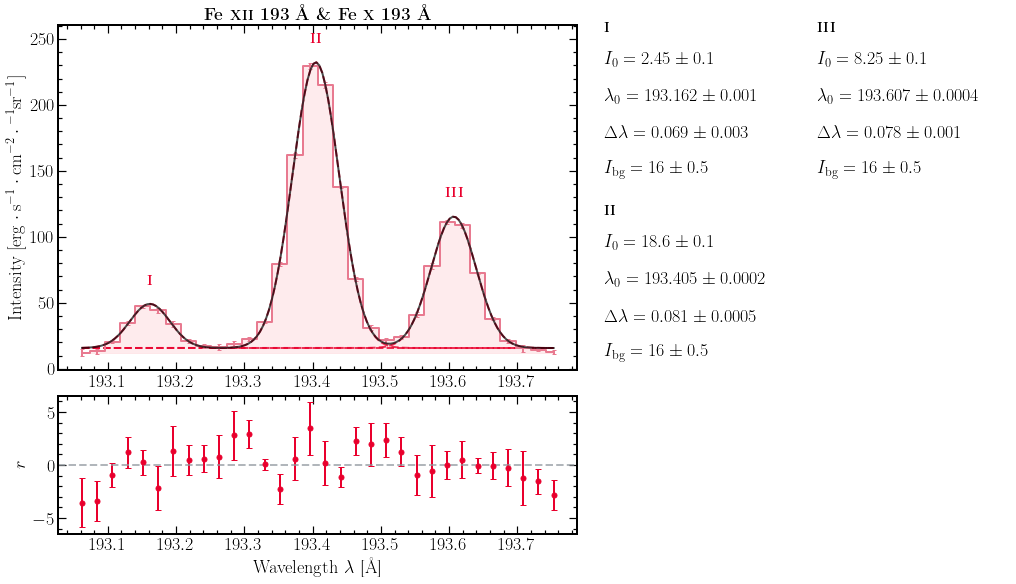

In [26]:
FeXII_FeX_193_slice = (1200,1232)
wvl_FeXII_FeX_193 = eis_wvl[FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]]
int_FeXII_FeX_193 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]],axis=0)

err_FeXII_FeX_193 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_FeX_193_slice[0]:FeXII_FeX_193_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_FeX_193_fit_model = SpectrumFitSingle(data=int_FeXII_FeX_193,wvl=wvl_FeXII_FeX_193,err=err_FeXII_FeX_193,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[193.15,193.4,193.6],
                                      int_max_init=[40,200,90],
                                      fwhm_init=[0.08,0.08,0.08])
# FeXII_FeX_193_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXII_FeX_193_fit_model.run_HahnMC(n_chain=10000)
FeXII_FeX_193_fit_model.run_lse()
FeXII_FeX_193_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA} \& Fe \textsc{x} 193 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_FeX_193_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXII_FeX_193_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.01713194        nan 0.04069108]


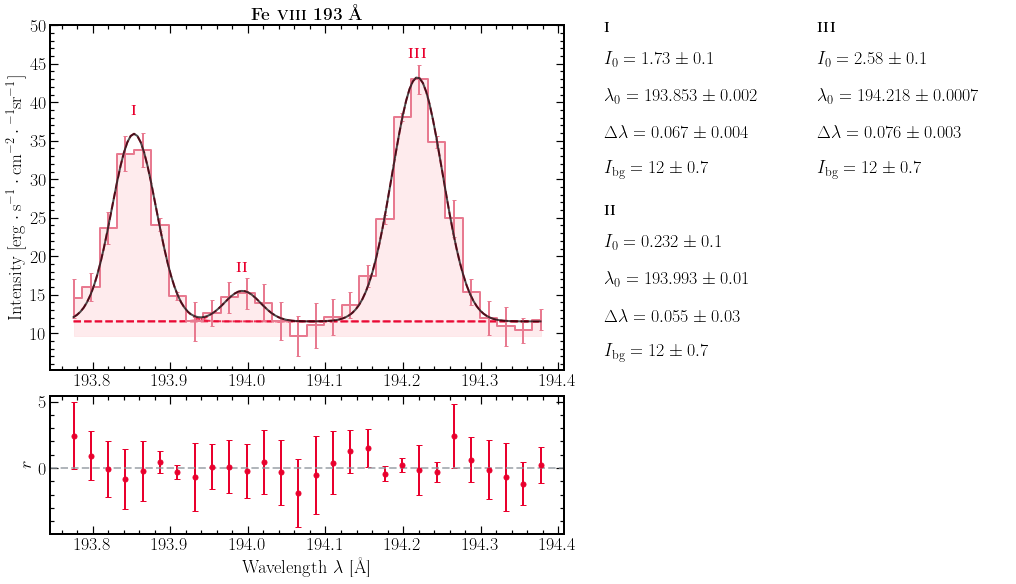

In [27]:
FeVIII_193_slice = (1232,1260)
wvl_FeVIII_193 = eis_wvl[FeVIII_193_slice[0]:FeVIII_193_slice[1]]
int_FeVIII_193 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_193_slice[0]:FeVIII_193_slice[1]],axis=0)

err_FeVIII_193 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_193_slice[0]:FeVIII_193_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_193_fit_model = SpectrumFitSingle(data=int_FeVIII_193,wvl=wvl_FeVIII_193,err=err_FeVIII_193,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[193.85,193.98,194.2],
                                      int_max_init=[30,10,30],
                                      fwhm_init=[0.08,0.08,0.08],int_cont_init=5)
# FeVIII_193_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_193_fit_model.run_HahnMC(n_chain=10000)
FeVIII_193_fit_model.run_lse()
FeVIII_193_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 193 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_193_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_193_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04224587 0.06728617]


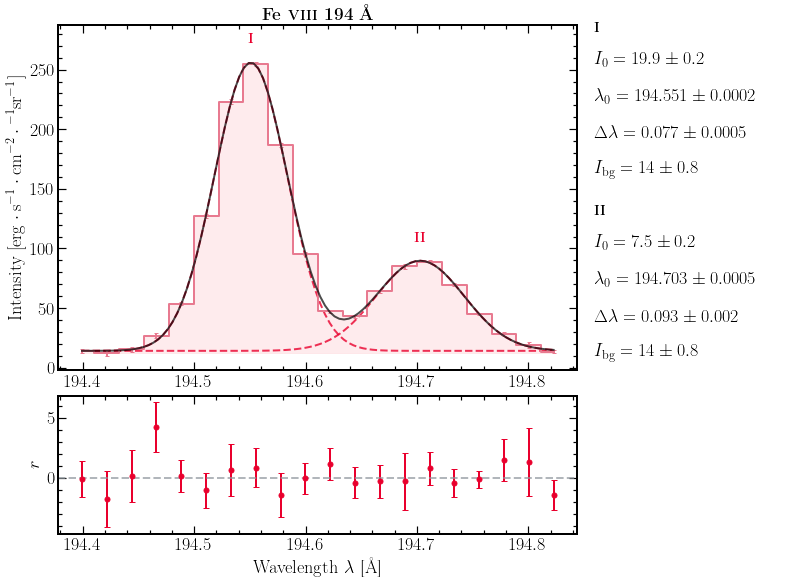

In [28]:
FeVIII_194_slice = (1260,1280)
wvl_FeVIII_194 = eis_wvl[FeVIII_194_slice[0]:FeVIII_194_slice[1]]
int_FeVIII_194 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_194_slice[0]:FeVIII_194_slice[1]],axis=0)

err_FeVIII_194 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_194_slice[0]:FeVIII_194_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_194_fit_model = SpectrumFitSingle(data=int_FeVIII_194,wvl=wvl_FeVIII_194,err=err_FeVIII_194,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[194.55,194.7],
                                      int_max_init=[250,80],
                                      fwhm_init=[0.08,0.08])
# FeVIII_194_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_194_fit_model.run_HahnMC(n_chain=10000)
FeVIII_194_fit_model.run_lse()
FeVIII_194_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 194 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_194_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_194_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0543183]


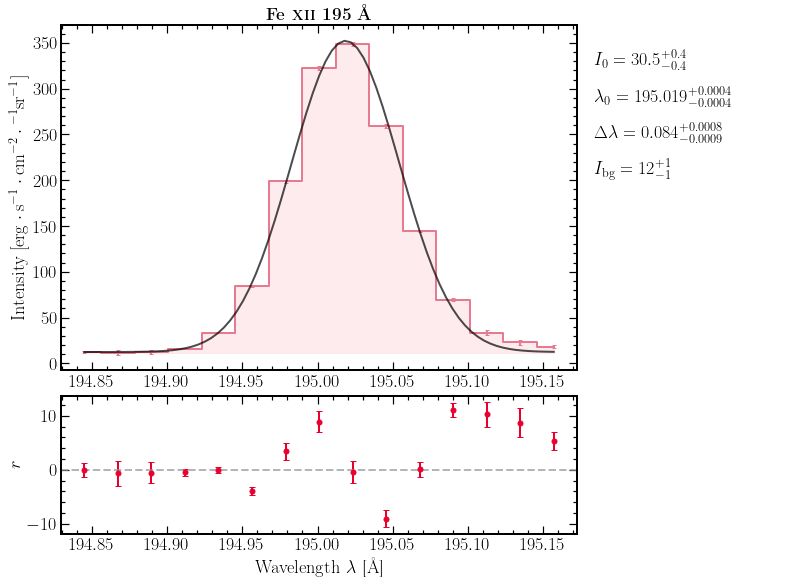

In [29]:
FeXII_195_slice = (1280,1295)
wvl_FeXII_195 = eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

err_FeXII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_195_slice[0]:FeXII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=err_FeXII_195,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[195.05],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_model.run_HahnMC(n_chain=10000)
# FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0460538  0.04605386]


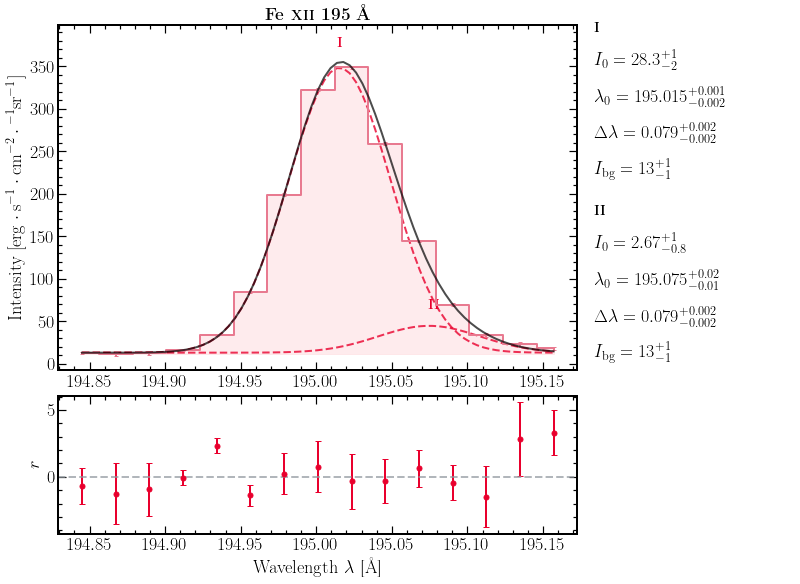

In [30]:
FeXII_195_slice = (1280,1295)
wvl_FeXII_195 = eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]]
int_FeXII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0)

err_FeXII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_195_slice[0]:FeXII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_195_fit_model = SpectrumFitSingle(data=int_FeXII_195,wvl=wvl_FeXII_195,err=err_FeXII_195,
                                      same_width=True,line_number=2,
                                      line_wvl_init=[195.05,195.10],
                                      int_max_init=[350,10],
                                      fwhm_init=[0.08])
# FeXII_195_fit_model.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_model.run_HahnMC(n_chain=10000)
# FeXII_195_fit_model.run_lse()
FeXII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.04607796 0.04607802 0.04777457        nan]


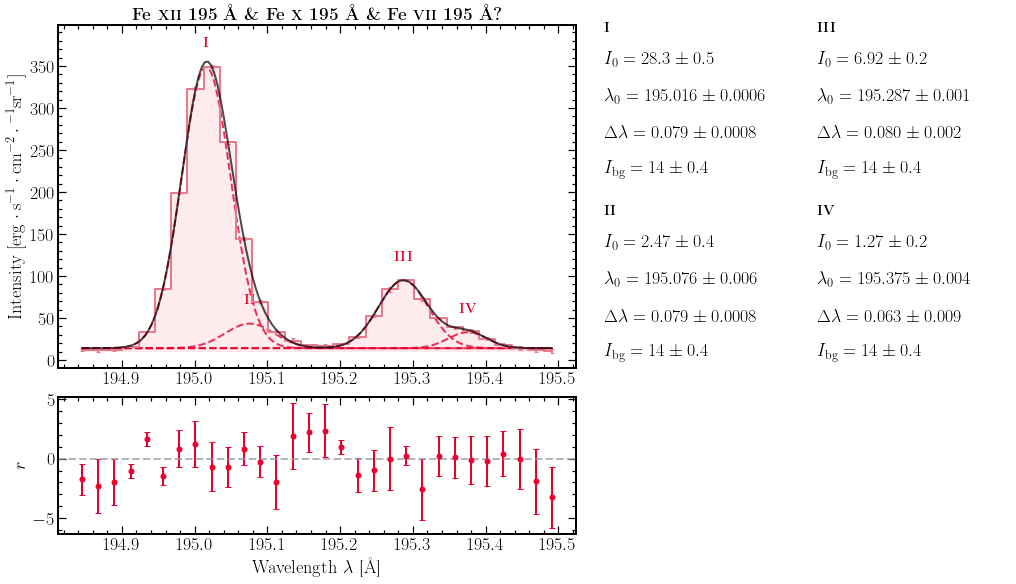

In [31]:
FeX_195_slice = (1280,1310)
wvl_FeX_195 = eis_wvl[FeX_195_slice[0]:FeX_195_slice[1]]
int_FeX_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_195_slice[0]:FeX_195_slice[1]],axis=0)

err_FeX_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_195_slice[0]:FeX_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_195_fit_model = SpectrumFitSingle(data=int_FeX_195,wvl=wvl_FeX_195,err=err_FeX_195,
                                      same_width=[True,True,False,False],line_number=4,
                                      line_wvl_init=[195.01,195.078,195.27,195.37],
                                      int_max_init=[350,10,60,30],
                                      fwhm_init=[0.08,0.08,0.08,0.08])
# FeX_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeX_195_fit_model.run_HahnMC(n_chain=10000)
FeX_195_fit_model.run_lse()
FeX_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA} \& Fe \textsc{x} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}? }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeX_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05664183        nan]


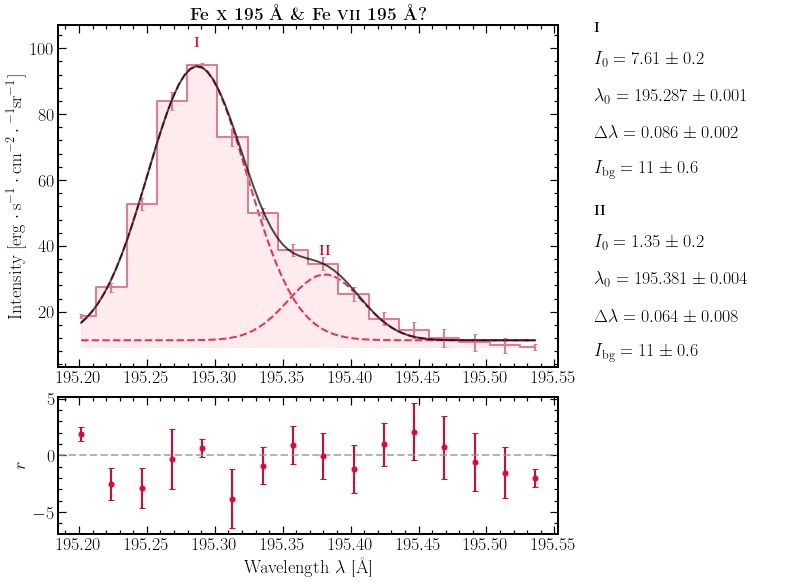

In [32]:
FeX_195_slice = (1296,1312)
wvl_FeX_195 = eis_wvl[FeX_195_slice[0]:FeX_195_slice[1]]
int_FeX_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_195_slice[0]:FeX_195_slice[1]],axis=0)

err_FeX_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_195_slice[0]:FeX_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_195_fit_model = SpectrumFitSingle(data=int_FeX_195,wvl=wvl_FeX_195,err=err_FeX_195,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[195.27,195.37],
                                      int_max_init=[60,30],
                                      fwhm_init=[0.08,0.08])
# FeX_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeX_195_fit_model.run_HahnMC(n_chain=10000)
FeX_195_fit_model.run_lse()
FeX_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeX_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0325324  0.05610978 0.05566724]


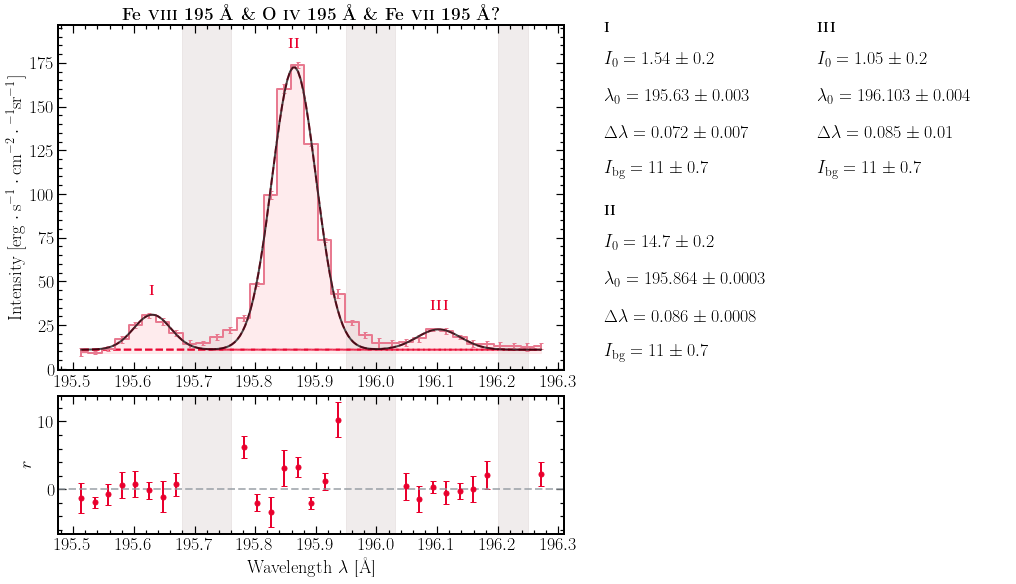

In [33]:
FeVIII_195_slice = (1310,1345)
wvl_FeVIII_195 = eis_wvl[FeVIII_195_slice[0]:FeVIII_195_slice[1]]
int_FeVIII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_195_slice[0]:FeVIII_195_slice[1]],axis=0)

err_FeVIII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_195_slice[0]:FeVIII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_195_fit_model = SpectrumFitSingle(data=int_FeVIII_195,wvl=wvl_FeVIII_195,err=err_FeVIII_195,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[195.62,195.85,196.1],
                                      int_max_init=[20,150,10],
                                      fwhm_init=[0.08,0.08,0.08],mask=[[195.68,195.76],[195.95,196.03],[196.2,196.25]])
# FeVIII_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_195_fit_model.run_HahnMC(n_chain=10000)
FeVIII_195_fit_model.run_lse()
FeVIII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 195 \mbox{\AA} \& O \textsc{iv} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03272478 0.08347984 0.03606125 0.08347991 0.07299844]


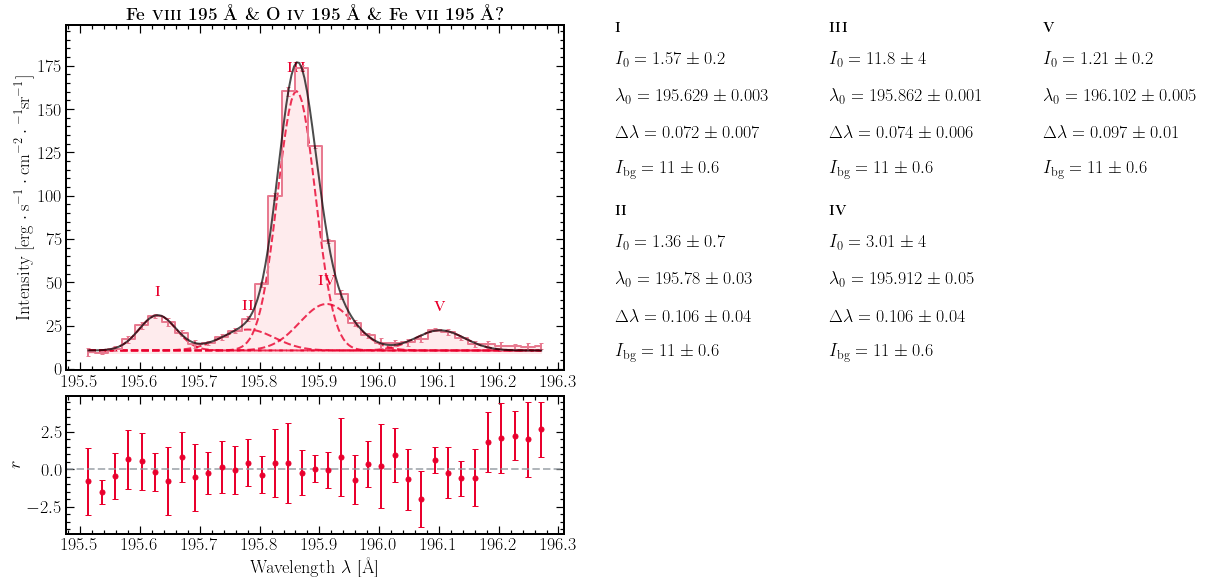

In [34]:
FeVIII_195_slice = (1310,1345)
wvl_FeVIII_195 = eis_wvl[FeVIII_195_slice[0]:FeVIII_195_slice[1]]
int_FeVIII_195 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_195_slice[0]:FeVIII_195_slice[1]],axis=0)

err_FeVIII_195 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_195_slice[0]:FeVIII_195_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_195_fit_model = SpectrumFitSingle(data=int_FeVIII_195,wvl=wvl_FeVIII_195,err=err_FeVIII_195,
                                      same_width=[False,True,False,True,False],line_number=5,
                                      line_wvl_init=[195.62,195.75,195.85,195.95,196.1],
                                      int_max_init=[20,10,150,10,10],
                                      fwhm_init=[0.08,0.08,0.08,0.08,0.08])
# FeVIII_195_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_195_fit_model.run_HahnMC(n_chain=10000)
FeVIII_195_fit_model.run_lse()
FeVIII_195_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 195 \mbox{\AA} \& O \textsc{iv} 195 \mbox{\AA} \& Fe \textsc{vii} 195 \mbox{\AA}?}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_195_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_195_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.04906534 0.02791195]


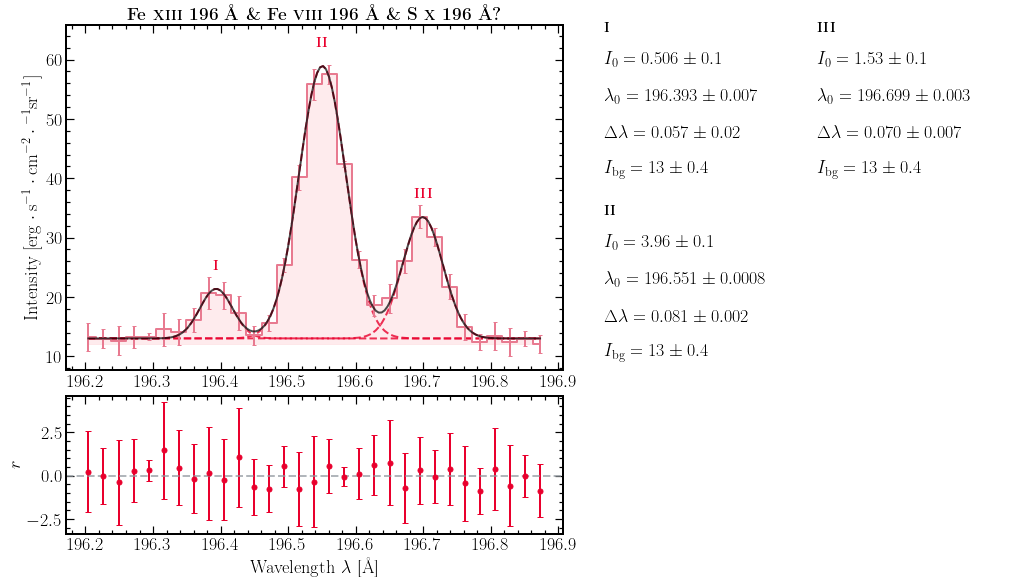

In [35]:
FeXIII_FeVIII_196_slice = (1341,1372)
wvl_FeXIII_FeVIII_196 = eis_wvl[FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]]
int_FeXIII_FeVIII_196 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]],axis=0)

err_FeXIII_FeVIII_196 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXIII_FeVIII_196_slice[0]:FeXIII_FeVIII_196_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXIII_FeVIII_196_fit_model = SpectrumFitSingle(data=int_FeXIII_FeVIII_196,wvl=wvl_FeXIII_FeVIII_196,err=err_FeXIII_FeVIII_196,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[196.4,196.55,196.7],
                                      int_max_init=[10,50,20],
                                      fwhm_init=[0.08,0.08,0.08])
# FeXIII_FeVIII_196_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXIII_FeVIII_196_fit_model.run_HahnMC(n_chain=10000)
FeXIII_FeVIII_196_fit_model.run_lse()
FeXIII_FeVIII_196_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xiii} 196 \mbox{\AA} \& Fe \textsc{viii} 196 \mbox{\AA} \& S \textsc{x} 196 \mbox{\AA}?}",
                        plot_hmc=False,xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXIII_FeVIII_196_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXIII_FeVIII_196_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07324232 0.06098286]


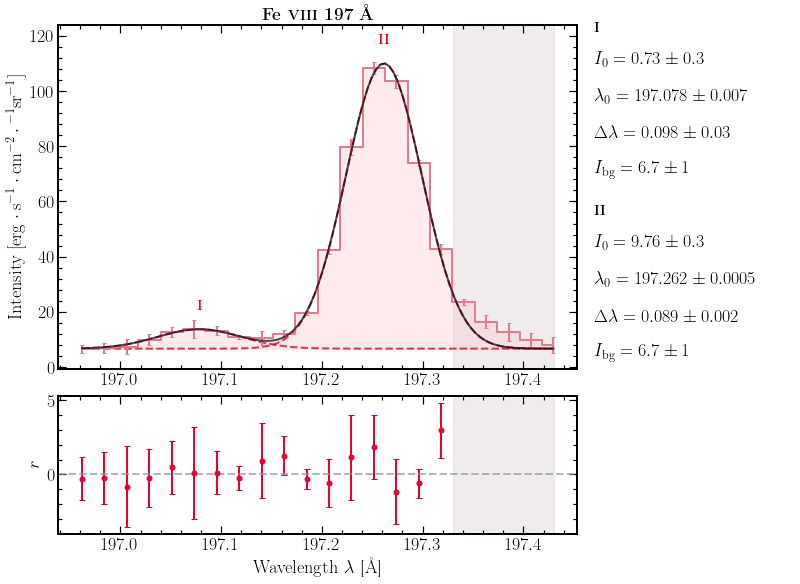

In [36]:
FeVIII_197_slice = (1375,1397)
wvl_FeVIII_197 = eis_wvl[FeVIII_197_slice[0]:FeVIII_197_slice[1]]
int_FeVIII_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_197_slice[0]:FeVIII_197_slice[1]],axis=0)

err_FeVIII_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_197_slice[0]:FeVIII_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_197_fit_model = SpectrumFitSingle(data=int_FeVIII_197,wvl=wvl_FeVIII_197,err=err_FeVIII_197,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[197.07,197.26],
                                      int_max_init=[5,100],
                                      fwhm_init=[0.08,0.08],mask=[[197.33,197.43]])
# FeVIII_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_197_fit_model.run_HahnMC(n_chain=10000)
FeVIII_197_fit_model.run_lse()
FeVIII_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 197 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.04865884        nan]


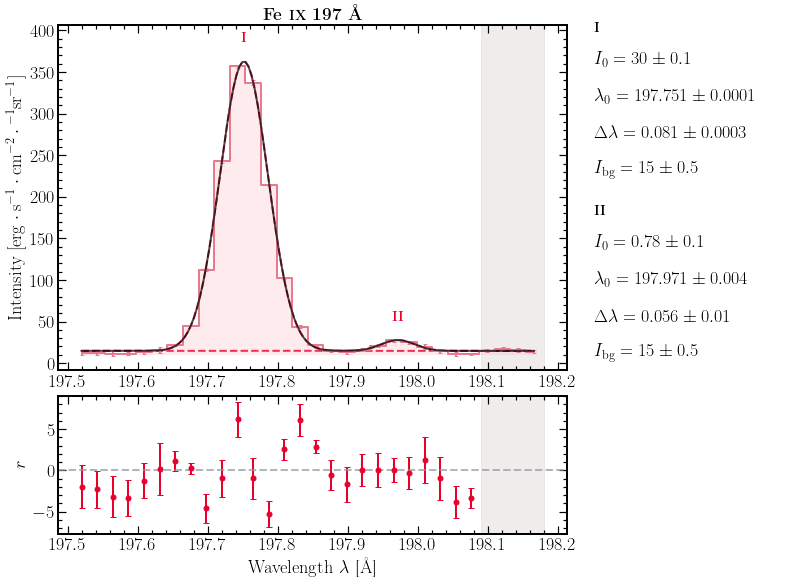

In [37]:
FeIX_197_slice = (1400,1430)
wvl_FeIX_197 = eis_wvl[FeIX_197_slice[0]:FeIX_197_slice[1]]
int_FeIX_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_197_slice[0]:FeIX_197_slice[1]],axis=0)

err_FeIX_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_197_slice[0]:FeIX_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_197_fit_model = SpectrumFitSingle(data=int_FeIX_197,wvl=wvl_FeIX_197,err=err_FeIX_197,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[197.75,197.95],
                                      int_max_init=[350,20],
                                      fwhm_init=[0.08,0.08],mask=[[198.09,198.18]])
# FeIX_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_197_fit_model.run_HahnMC(n_chain=10000)
FeIX_197_fit_model.run_lse()
FeIX_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeIX_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04768999]


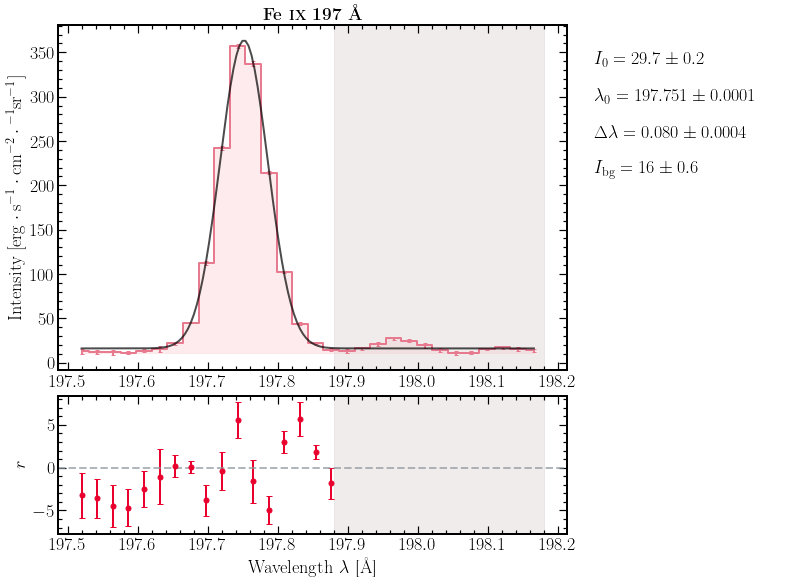

In [38]:
FeIX_197_slice = (1400,1430)
wvl_FeIX_197 = eis_wvl[FeIX_197_slice[0]:FeIX_197_slice[1]]
int_FeIX_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_197_slice[0]:FeIX_197_slice[1]],axis=0)

err_FeIX_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_197_slice[0]:FeIX_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_197_fit_model = SpectrumFitSingle(data=int_FeIX_197,wvl=wvl_FeIX_197,err=err_FeIX_197,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[197.75],
                                      int_max_init=[350],
                                      fwhm_init=[0.08],mask=[[197.88,198.18]])
# FeIX_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_197_fit_model.run_HahnMC(n_chain=10000)
FeIX_197_fit_model.run_lse()
FeIX_197_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeIX_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05191728 0.03387522]


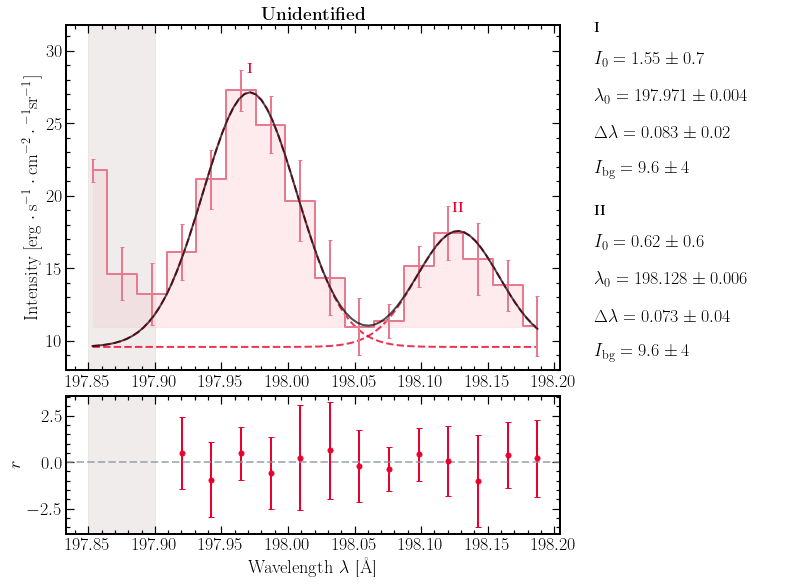

In [46]:
Uniden_197_slice = (1415,1431)
wvl_Uniden_197 = eis_wvl[Uniden_197_slice[0]:Uniden_197_slice[1]]
int_Uniden_197 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    Uniden_197_slice[0]:Uniden_197_slice[1]],axis=0)

err_Uniden_197 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        Uniden_197_slice[0]:Uniden_197_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

Uniden_197_fit_model = SpectrumFitSingle(data=int_Uniden_197,wvl=wvl_Uniden_197,err=err_Uniden_197,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[197.97,198.12],
                                      int_max_init=[10,5],int_cont_init=12,
                                      fwhm_init=[0.08,0.08],mask=[[197.85,197.9]])
# Uniden_197_fit_model.plot(plot_fit=False,plot_params=False)
# # # Uniden_197_fit_model.run_HahnMC(n_chain=10000)
Uniden_197_fit_model.run_lse()
Uniden_197_fit_model.plot(plot_title=r"\textbf{Unidentified}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(Uniden_197_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,Uniden_197_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06833801 0.04579259]


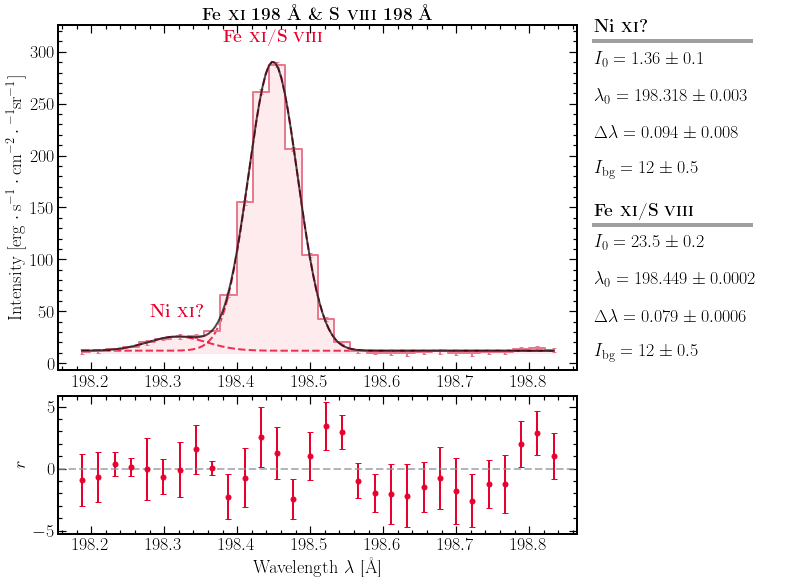

In [55]:
FeXI_SVIII_198_slice = (1430,1460)
wvl_FeXI_SVIII_198 = eis_wvl[FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]]
int_FeXI_SVIII_198 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]],axis=0)

err_FeXI_SVIII_198 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_SVIII_198_slice[0]:FeXI_SVIII_198_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_SVIII_198_fit_model = SpectrumFitSingle(data=int_FeXI_SVIII_198,wvl=wvl_FeXI_SVIII_198,err=err_FeXI_SVIII_198,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[198.3,198.45],
                                      int_max_init=[20,270],
                                      fwhm_init=[0.08,0.08])
# FeXI_SVIII_198_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_SVIII_198_fit_model.run_HahnMC(n_chain=10000)
FeXI_SVIII_198_fit_model.run_lse()
FeXI_SVIII_198_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 198 \mbox{\AA} \& S \textsc{viii} 198 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Ni \textsc{xi}?}",r"\textbf{Fe \textsc{xi}/S \textsc{viii}}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_SVIII_198_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXI_SVIII_198_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0620483  0.07208583 0.03350023]


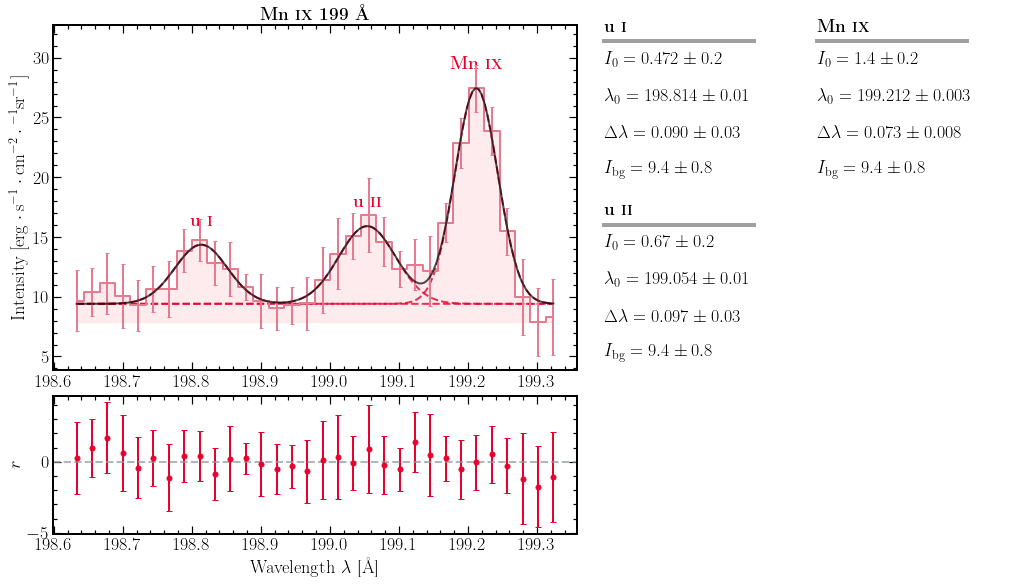

In [68]:
MnIX_199_slice = (1450,1482)
wvl_MnIX_199 = eis_wvl[MnIX_199_slice[0]:MnIX_199_slice[1]]
int_MnIX_199 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    MnIX_199_slice[0]:MnIX_199_slice[1]],axis=0)

err_MnIX_199 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        MnIX_199_slice[0]:MnIX_199_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

MnIX_199_fit_model = SpectrumFitSingle(data=int_MnIX_199,wvl=wvl_MnIX_199,err=err_MnIX_199,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[198.81,199.05,199.2],
                                      int_max_init=[5,10,20],
                                      fwhm_init=[0.08,0.08,0.08])
#MnIX_199_fit_model.plot(plot_fit=False,plot_params=False)
# # # MnIX_199_fit_model.run_HahnMC(n_chain=10000)
MnIX_199_fit_model.run_lse()
MnIX_199_fit_model.plot(plot_title=r"\textbf{Mn \textsc{ix} 199 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{u \textsc{ii}}",r"\textbf{Mn \textsc{ix}}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(MnIX_199_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,MnIX_199_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.06440945 0.06154666 0.09005566 0.07188476]


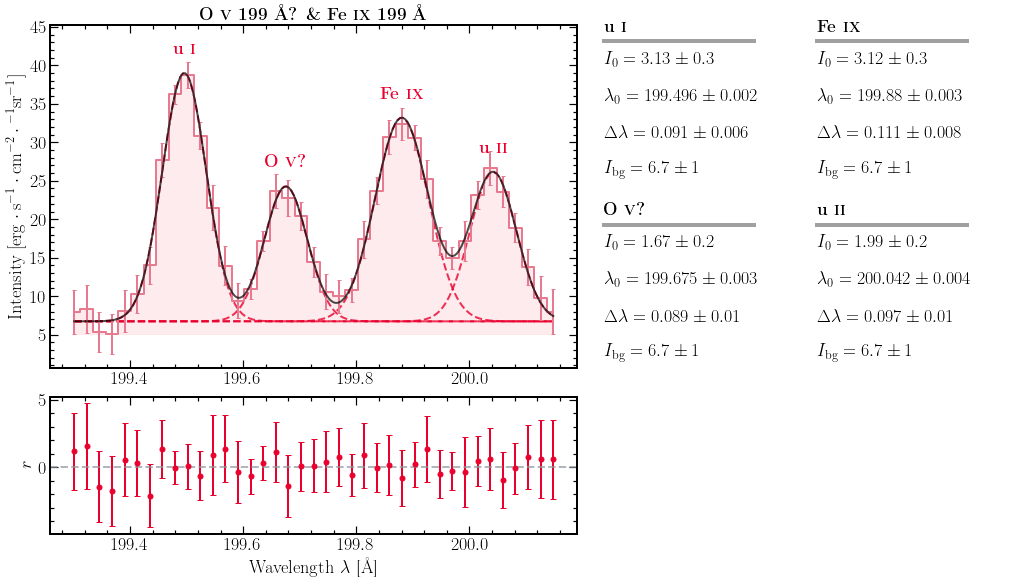

In [74]:
FeIX_199_slice = (1480,1519)
wvl_FeIX_199 = eis_wvl[FeIX_199_slice[0]:FeIX_199_slice[1]]
int_FeIX_199 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_199_slice[0]:FeIX_199_slice[1]],axis=0)

err_FeIX_199 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_199_slice[0]:FeIX_199_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_199_fit_model = SpectrumFitSingle(data=int_FeIX_199,wvl=wvl_FeIX_199,err=err_FeIX_199,
                                      same_width=False,line_number=4,
                                      line_wvl_init=[199.5,199.7,199.9,200.04],
                                      int_max_init=[30,20,25,20],
                                      fwhm_init=[0.08,0.08,0.08,0.08])
# FeIX_199_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeIX_199_fit_model.run_HahnMC(n_chain=10000)
FeIX_199_fit_model.run_lse()
FeIX_199_fit_model.plot(plot_title=r"\textbf{O \textsc{v} 199 \mbox{\AA}? \& Fe \textsc{ix} 199 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{O \textsc{v}?}",
                        r"\textbf{Fe \textsc{ix}}",r"\textbf{u \textsc{ii}}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_199_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeIX_199_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.0247155  0.0352883  0.03604947 0.07514683]


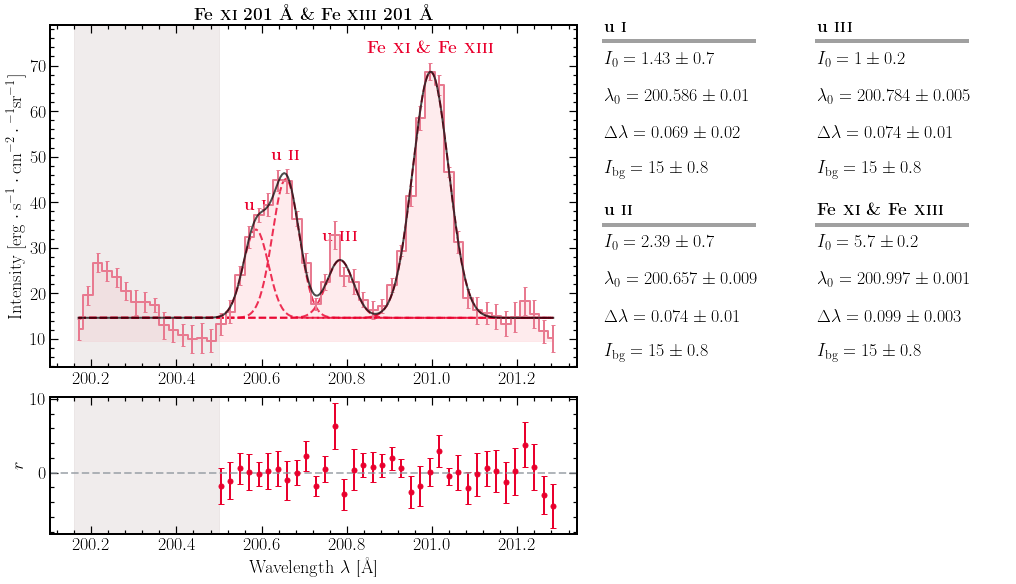

In [79]:
FeXI_FeXIII_201_slice = (1519,1570)
wvl_FeXI_FeXIII_201 = eis_wvl[FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]]
int_FeXI_FeXIII_201 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]],axis=0)

err_FeXI_FeXIII_201 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeXIII_201_slice[0]:FeXI_FeXIII_201_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeXIII_201_fit_model = SpectrumFitSingle(data=int_FeXI_FeXIII_201,wvl=wvl_FeXI_FeXIII_201,err=err_FeXI_FeXIII_201,
                                      same_width=False,line_number=4,
                                      line_wvl_init=[200.56,200.64,200.78,201.0],
                                      int_max_init=[20,30,5,65],
                                      fwhm_init=[0.08,0.08,0.08,0.08],mask=[[200.16,200.5]])
# FeXI_FeXIII_201_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeXI_FeXIII_201_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeXIII_201_fit_model.run_lse()
FeXI_FeXIII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 201 \mbox{\AA} \& Fe \textsc{xiii} 201 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",r"\textbf{u \textsc{ii}}",
                        r"\textbf{u \textsc{iii}}",r"\textbf{Fe \textsc{xi} \& Fe \textsc{xiii}}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeXIII_201_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXI_FeXIII_201_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05384043 0.04154588 0.04104987]


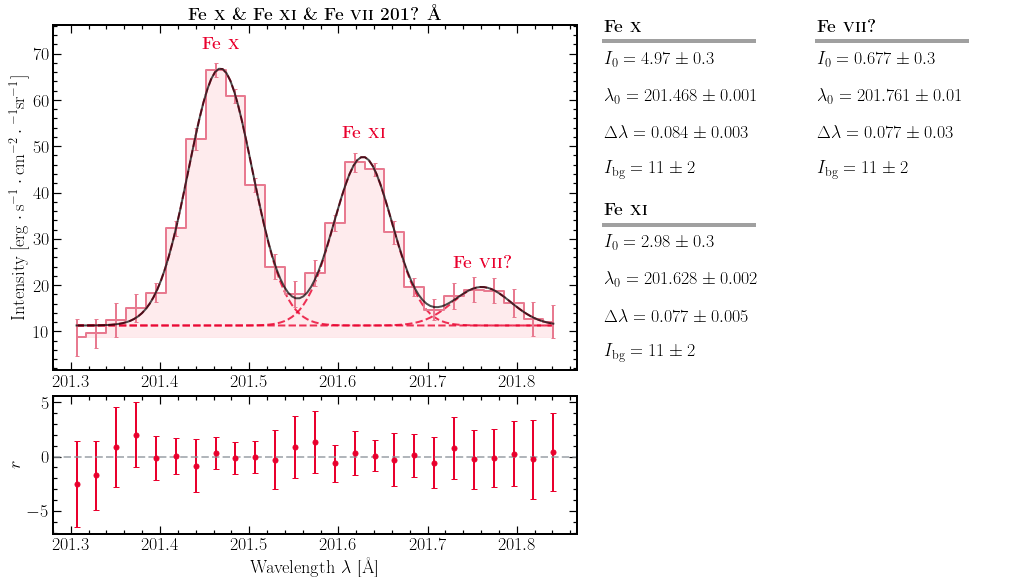

In [91]:
FeX_FeXI_FeVII_201_slice = (1570,1595)
wvl_FeX_FeXI_FeVII_201 = eis_wvl[FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]]
int_FeX_FeXI_FeVII_201 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]],axis=0)

err_FeX_FeXI_FeVII_201 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_FeXI_FeVII_201_slice[0]:FeX_FeXI_FeVII_201_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_FeXI_FeVII_201_fit_model = SpectrumFitSingle(data=int_FeX_FeXI_FeVII_201,wvl=wvl_FeX_FeXI_FeVII_201,err=err_FeX_FeXI_FeVII_201,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[201.45,201.65,201.75],
                                      int_max_init=[60,40,10],
                                      fwhm_init=[0.08,0.08,0.08])
# FeX_FeXI_FeVII_201_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeX_FeXI_FeVII_201_fit_model.run_HahnMC(n_chain=10000)
FeX_FeXI_FeVII_201_fit_model.run_lse()
FeX_FeXI_FeVII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} \& Fe \textsc{xi} \& Fe \textsc{vii} 201? \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{xi}}",
                        r"\textbf{Fe \textsc{vii}?}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_FeXI_FeVII_201_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeX_FeXI_FeVII_201_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05074436]


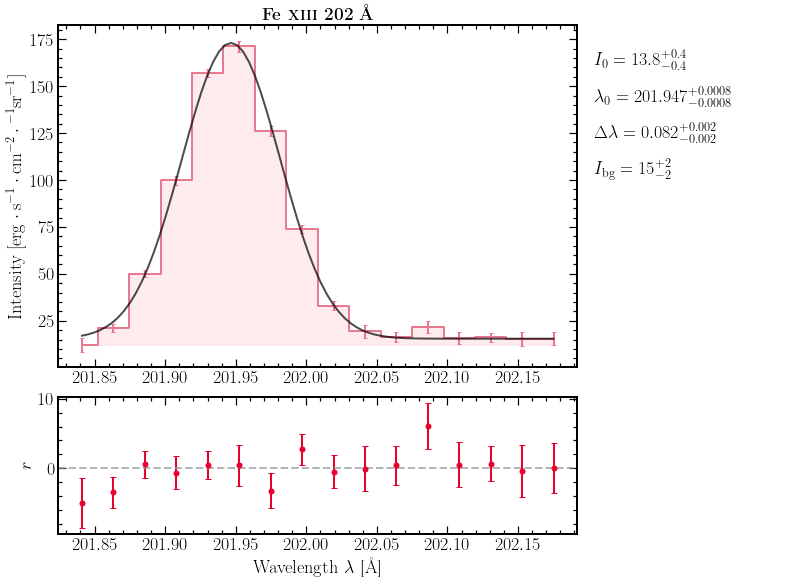

In [94]:
FeXIII_201_slice = (1594,1610)
wvl_FeXIII_201 = eis_wvl[FeXIII_201_slice[0]:FeXIII_201_slice[1]]
int_FeXIII_201 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXIII_201_slice[0]:FeXIII_201_slice[1]],axis=0)

err_FeXIII_201 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXIII_201_slice[0]:FeXIII_201_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXIII_201_fit_model = SpectrumFitSingle(data=int_FeXIII_201,wvl=wvl_FeXIII_201,err=err_FeXIII_201,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[201.94],
                                      int_max_init=[150],
                                      fwhm_init=[0.08])
# FeXIII_201_fit_model.plot(plot_fit=False,plot_params=False)
FeXIII_201_fit_model.run_HahnMC(n_chain=10000)
# FeXIII_201_fit_model.run_lse()
FeXIII_201_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXIII_201_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXIII_201_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [0.05514419 0.0559875  0.01063804 0.06102298        nan]


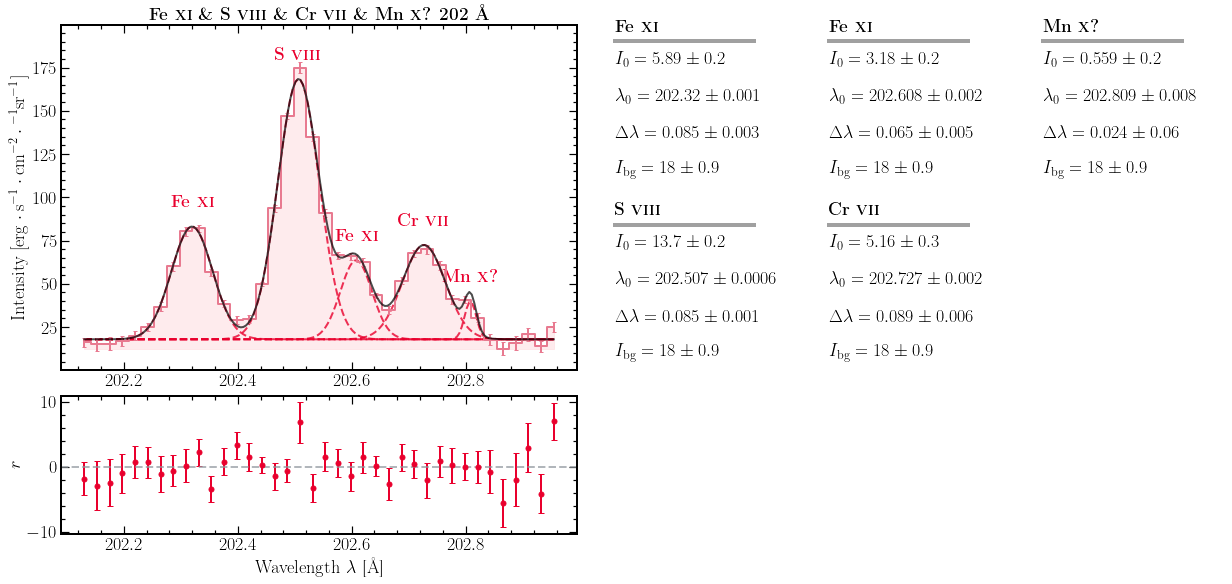

In [114]:
SVIII_202_slice = (1607,1645)
wvl_SVIII_202 = eis_wvl[SVIII_202_slice[0]:SVIII_202_slice[1]]
int_SVIII_202 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    SVIII_202_slice[0]:SVIII_202_slice[1]],axis=0)

err_SVIII_202 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        SVIII_202_slice[0]:SVIII_202_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

SVIII_202_fit_model = SpectrumFitSingle(data=int_SVIII_202,wvl=wvl_SVIII_202,err=err_SVIII_202,
                                      same_width=False,line_number=5,
                                      line_wvl_init=[202.32,202.5,202.6,202.73,202.78],
                                      int_max_init=[60,150,50,50,10],
                                      fwhm_init=[0.08,0.08,0.08,0.06,0.08])
# SVIII_202_fit_model.plot(plot_fit=False,plot_params=False)
# # # SVIII_202_fit_model.run_HahnMC(n_chain=10000)
SVIII_202_fit_model.run_lse()
SVIII_202_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& S \textsc{viii}  \& Cr \textsc{vii} \& Mn \textsc{x}? 202 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption = [r"\textbf{Fe \textsc{xi}}",r"\textbf{S \textsc{viii}}",
                        r"\textbf{Fe \textsc{xi}}",r"\textbf{Cr \textsc{vii}}",r"\textbf{Mn \textsc{x}?}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(SVIII_202_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,SVIII_202_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.07239215 0.07239221]


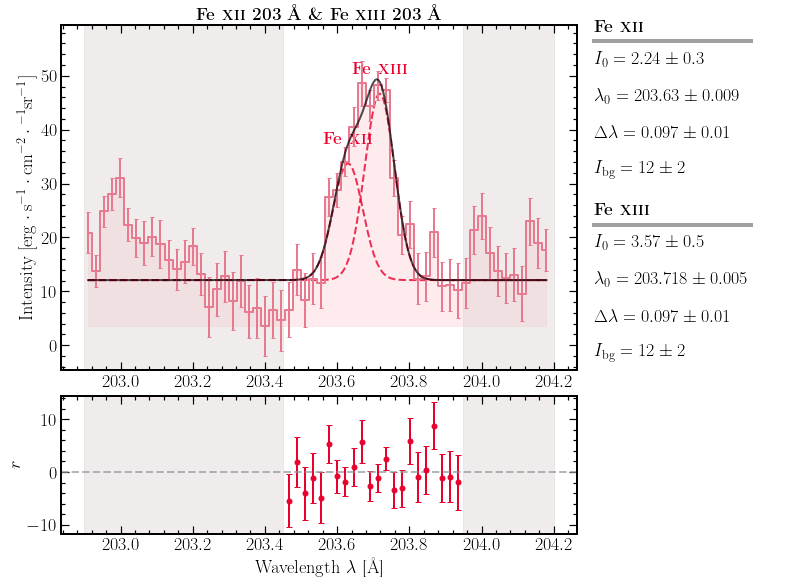

In [129]:
FeXII_FeXIII_202_slice = (1642,1700)
wvl_FeXII_FeXIII_202 = eis_wvl[FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]]
int_FeXII_FeXIII_202 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]],axis=0)

err_FeXII_FeXIII_202 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXII_FeXIII_202_slice[0]:FeXII_FeXIII_202_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXII_FeXIII_202_fit_model = SpectrumFitSingle(data=int_FeXII_FeXIII_202,wvl=wvl_FeXII_FeXIII_202,err=err_FeXII_FeXIII_202,
                                      same_width=True,line_number=2,
                                      line_wvl_init=[203.6,203.7],
                                      int_max_init=[5,50],
                                      fwhm_init=[0.07],mask=[[202.9,203.45],[203.95,204.2]])
# FeXII_FeXIII_202_fit_model.plot(plot_fit=False,plot_params=False)
# # FeXII_FeXIII_202_fit_model.run_HahnMC(n_chain=10000)
FeXII_FeXIII_202_fit_model.run_lse()
FeXII_FeXIII_202_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xii} 203 \mbox{\AA} \& Fe \textsc{xiii} 203 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xii}}",r"\textbf{Fe \textsc{xiii}}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_FeXIII_202_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeXII_FeXIII_202_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.03585304 0.07982421 0.04387681]


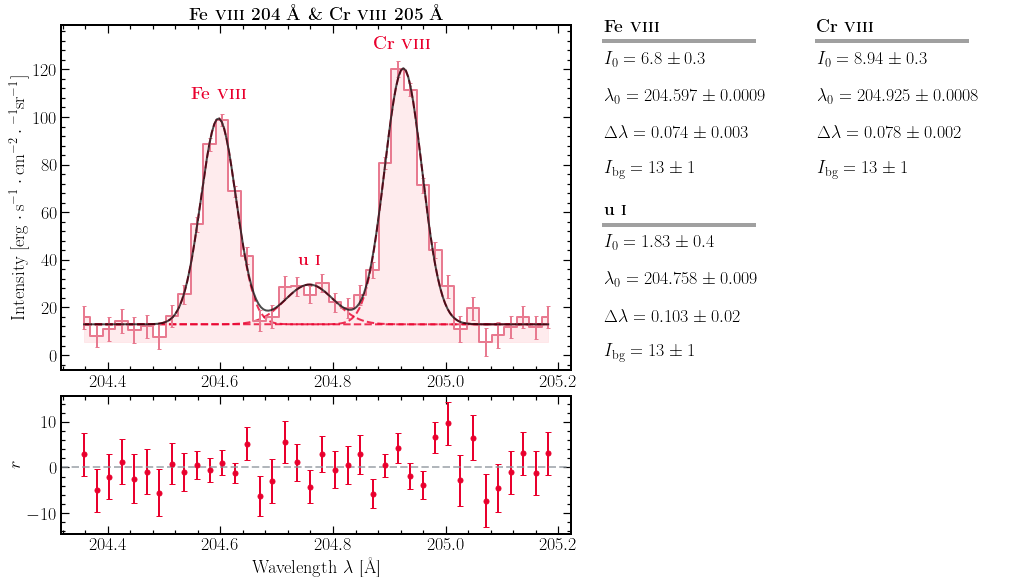

In [136]:
FeVIII_204_CrVIII_205_slice = (1707,1745)
wvl_FeVIII_204_CrVIII_205 = eis_wvl[FeVIII_204_CrVIII_205_slice[0]:FeVIII_204_CrVIII_205_slice[1]]
int_FeVIII_204_CrVIII_205 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_204_CrVIII_205_slice[0]:FeVIII_204_CrVIII_205_slice[1]],axis=0)

err_FeVIII_204_CrVIII_205 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_204_CrVIII_205_slice[0]:FeVIII_204_CrVIII_205_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_204_CrVIII_205_fit_model = SpectrumFitSingle(data=int_FeVIII_204_CrVIII_205,wvl=wvl_FeVIII_204_CrVIII_205,err=err_FeVIII_204_CrVIII_205,
                                      same_width=False,line_number=3,
                                      line_wvl_init=[204.6,204.75,204.92],
                                      int_max_init=[90,20,100],
                                      fwhm_init=[0.08,0.08,0.08])
# FeVIII_204_CrVIII_205_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_204_CrVIII_205_fit_model.run_HahnMC(n_chain=10000)
FeVIII_204_CrVIII_205_fit_model.run_lse()
FeVIII_204_CrVIII_205_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 204 \mbox{\AA} \& Cr \textsc{viii} 205 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{viii}}",r"\textbf{u \textsc{i}}",
                        r"\textbf{Cr \textsc{viii}}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_204_CrVIII_205_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_204_CrVIII_205_fit_model.line_wvl_fit,eis_wvl[0])**2))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


FWHM after removing instrumental broadening:  [       nan 0.08208548]


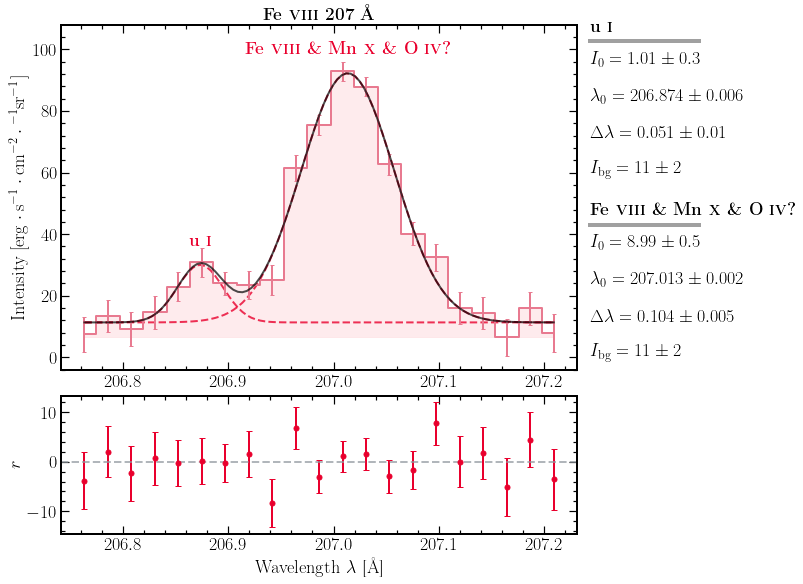

In [148]:
FeVIII_207_slice = (1815,1836)
wvl_FeVIII_207 = eis_wvl[FeVIII_207_slice[0]:FeVIII_207_slice[1]]
int_FeVIII_207 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeVIII_207_slice[0]:FeVIII_207_slice[1]],axis=0)

err_FeVIII_207 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeVIII_207_slice[0]:FeVIII_207_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeVIII_207_fit_model = SpectrumFitSingle(data=int_FeVIII_207,wvl=wvl_FeVIII_207,err=err_FeVIII_207,
                                      same_width=False,line_number=2,
                                      line_wvl_init=[206.86,207.0],
                                      int_max_init=[20,90],
                                      fwhm_init=[0.08,0.08])
# FeVIII_207_fit_model.plot(plot_fit=False,plot_params=False)
# # # FeVIII_207_fit_model.run_HahnMC(n_chain=10000)
FeVIII_207_fit_model.run_lse()
FeVIII_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{viii} 207 \mbox{\AA} }",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{u \textsc{i}}",
                        r"\textbf{Fe \textsc{viii} \& Mn \textsc{x} \& O \textsc{iv}?}"],
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_207_fit_model.fwhm_fit**2 - \
eis_slit_width_offset(387,2,FeVIII_207_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.02943354]


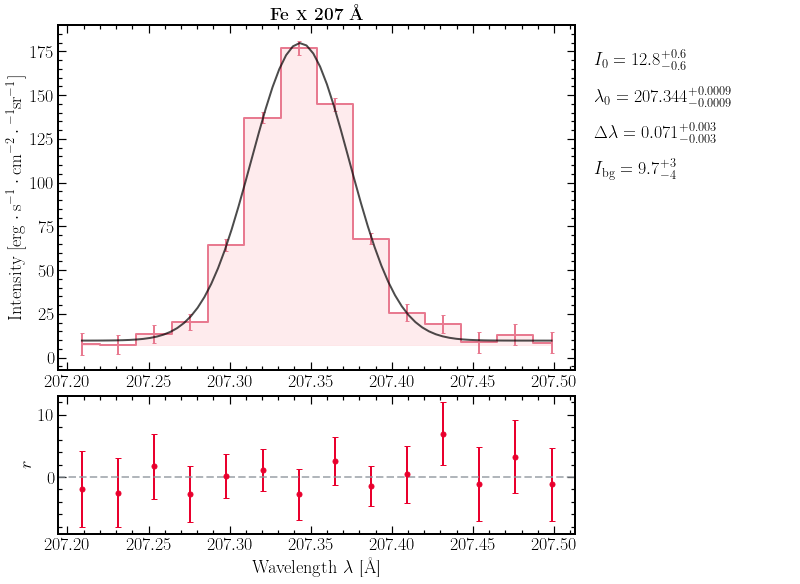

In [155]:
FeX_207_slice = (1835,1849)
wvl_FeX_207 = eis_wvl[FeX_207_slice[0]:FeX_207_slice[1]]
int_FeX_207 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_207_slice[0]:FeX_207_slice[1]],axis=0)

err_FeX_207 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_207_slice[0]:FeX_207_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_207_fit_model = SpectrumFitSingle(data=int_FeX_207,wvl=wvl_FeX_207,err=err_FeX_207,
                                      same_width=False,line_number=1,
                                      line_wvl_init=[207.34],
                                      int_max_init=[175],
                                      fwhm_init=[0.08])
# FeX_207_fit_model.plot(plot_fit=False,plot_params=False)
FeX_207_fit_model.run_HahnMC(n_chain=10000)
# FeX_207_fit_model.run_lse()
FeX_207_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 207 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_207_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeX_207_fit_model.line_wvl_fit,eis_wvl[0])**2))